## Business Objective

**Provide to The General Insurance**
 - A better understanding of their customers (clustering)
 - A better way to predict the amount for a quote (MQuotedTotalPayment)
 - Most important features from the data
 - A better way to assess risk


## Technical Objective
- Clustering: K-Means
- Regression: Ridge Regression
- Decision Tree Classifier – identifies specific features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

%matplotlib inline

pd.set_option('display.max_columns', 500)

plt.style.use('seaborn')

C:\Users\oladi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load datasets into system

df_ap3  = pd.read_csv("data\AP03.csv", index_col=None, header=0)
df_ClaimMasterTrans = pd.read_csv("data\Phase2_ClaimMasterTrans.csv", index_col=0, header=0)
df_MasterQuote = pd.read_csv("data\Phase2_MasterQuote.csv", index_col=0, header=0)
df_TheGeneral = pd.read_csv("data\Phase2_TheGeneral.csv", index_col=0, header=0)

In [3]:
#show top 3 rows of all dataframes

display("------------------------------------------------Abilitech------------------------------------------------------")
display(df_ap3.head(3))
display("------------------------------------------------Claims Master Transactions------------------------------------------------------")
display(df_ClaimMasterTrans.head(3))
display("------------------------------------------------Master Quote------------------------------------------------------")
display(df_MasterQuote.head(3))
display("------------------------------------------------The General------------------------------------------------------")
df_TheGeneral.head(3)

'------------------------------------------------Abilitech------------------------------------------------------'

,AbilitecContactID,ACX_ZIPCODE,ACX_ZIP4,AP003732_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4869,AP003733_Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4870,AP003734_Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising_V2_rank_base_20_rbgm4871,AP003739_Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4876,AP003746_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer_V2_rank_base_20_RBGM4885,AP003782_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology_V2_rank_base_20_RBGM4925,AP003797_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4941,AP003800_Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4944,AP003827_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style_V2_rank_base_20_RBGM4973,AP003847_Influenced_to_Purchase_Online_Pureplay_Footwear_V2_rank_base_20_rbgm4993,AP003863_Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference_V2_rank_base_20_RBGM5011,AP003864_Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference_V2_rank_base_20_rbgm5012,AP003865_Purchase_Kids_Athletic_Footwear_V2_rank_base_20_RBGM5013,AP003866_Purchase_Kids_Boots_Footwear_V2_rank_base_20_RBGM5014,AP003867_Purchase_Kids_Dress_Footwear_V2_rank_base_20_RBGM5016,AP003868_Purchase_Kids_Footwear_V2_rank_base_20_RBGM5017,AP003869_Purchase_Kids_Sandal_Footwear_V2_rank_base_20_RBGM5018,AP003870_Purchase_Mens_Athletic_Footwear_V2_rank_base_20_RBGM5019,AP003871_Purchase_Mens_Boots_Footwear_V2_rank_base_20_RBGM5020,AP003872_Purchase_Mens_Casual_Footwear_V2_rank_base_20_RBGM5021,AP003873_Purchase_Mens_Dress_Footwear_V2_rank_base_20_RBGM5022,AP003874_Purchase_Mens_Footwear_V2_rank_base_20_RBGM5023,AP003875_Purchase_New_Balance_Footwear_V2_rank_base_20_RBGM5025,AP003876_Purchase_Nike_Footwear_V2_rank_base_20_RBGM5026,AP003877_Purchase_Footwear_at_Walmart_V2_rank_base_20_RBGM5027,AP003878_Purchase_Footwear_from_Macys_V2_rank_base_20_RBGM5028,AP003879_Purchase_Footwear_from_Shoe_Carnival_V2_rank_base_20_RBGM5029,AP003880_Purchase_Footwear_from_Sears_V2_rank_base_20_RBGM5030,AP003881_Purchase_Footwear_from_Shoe_Department_V2_rank_base_20_RBGM5031,AP003882_Purchase_Footwear_from_Ross_Dress_For_Less_V2_rank_base_20_RBGM5032,AP003883_Purchase_Footwear_from_Dicks_Sporting_Goods_V2_rank_base_20_RBGM5033,AP003884_Purchase_Footwear_from_Marshalls_V2_rank_base_20_RBGM5034,AP003886_Purchase_Footwear_from_Academy_Sports_V2_rank_base_20_RBGM5036,AP003887_Purchase_Footwear_from_Big_5_V2_rank_base_20_RBGM5037,AP003888_Purchase_Footwear_from_Payless_V2_rank_base_20_RBGM5038,AP003889_Purchase_Footwear_from_Finish_Line_V2_rank_base_20_RBGM5039,AP003890_Purchase_Footwear_from_The_Sports_Authority_V2_rank_base_20_RBGM5040,AP003891_Purchase_Footwear_from_Nike_Outlet_V2_rank_base_20_RBGM5041,AP003892_Purchase_Footwear_from_a_Skechers_Store_V2_rank_base_20_RBGM5042,AP003893_Purchase_Footwear_from_Dillards_V2_rank_base_20_RBGM5043,AP003894_Purchase_Footwear_from_Zappos_com_V2_rank_base_20_RBGM5044,AP003895_Purchase_Footwear_from_Lady_Footlocker_V2_rank_base_20_RBGM5045,AP003896_Purchase_Footwear_from_Rack_Room_V2_rank_base_20_RBGM5046,AP003897_Purchase_Footwear_from_T_J_Maxx_V2_rank_base_20_RBGM5047,AP003898_Purchase_Footwear_from_eBay_V2_rank_base_20_RBGM5048,AP003899_Purchase_Footwear_from_Kohls_V2_rank_base_20_RBGM5049,AP003900_Purchase_Footwear_from_Nordstrom_V2_rank_base_20_RBGM5050,AP003901_Purchase_Footwear_from_Journeys_V2_rank_base_20_RBGM5052,AP003902_Purchase_Footwear_from_Burlington_Coat_Factory_V2_rank_base_20_RBGM5053,AP003903_Purchase_Footwear_from_Amazon_V2_rank_base_20_RBGM5055,AP003904_Purchase_Footwear_from_Belk_V2_rank_base_20_RBGM5056,AP003905_Purchase_Footwear_from_Meijer_V2_rank_base_20_RBGM5057,AP003906_Purchase_Footwear_from_N

'------------------------------------------------Claims Master Transactions------------------------------------------------------'

,ClaimNumber,AtFaultDescription,ClaimStatus,ClaimType,DateOfLoss,DriverID,LossState,PolicyNumber,PolicyStateCode,SubrogrationFlag,TermEffectiveDate,VehicleID,ClaimTransPaidLoss,ClaimTransCount,DaysToClaim,DaysToClaim_h
0,PA0002364104,No fault,C,HAIL,2018-08-06 00:00:00,98,CO,Q080MDE1MTY2,CO,NO,2018-05-29 00:00:00,1,5086.61,9.0,69.0,1656
2,PA0002344011,Insured at fault,C,PG_COLLISIONINTERSECTION,2018-06-17 00:00:00,1,CO,Q080MDExOTIz,CO,NO,2018-05-25 00:00:00,1,21397.74,53.0,23.0,552
3,PA0002348918,No fault,C,HAIL,2018-06-19 00:00:00,98,CO,Q080MDIyMDcw,CO,YES,2018-06-01 00:00:00,2,0.00,14.0,18.0,432


'------------------------------------------------Master Quote------------------------------------------------------'

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,DsDwellingDescription,DsMultiCarDescription,NamedInsuredAge,NamedInsuredDriverPoints,DriverNumber,AbilitecContactID,AbilitecHouseholdID,DriverCount
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,1/2/16 22:25,1/2/16 0:00,1/2/17 0:00,No Dwelling Discount,No Multi-Car Discount,40,0,1,04ZJUS0220X4MKG7,04ZJUS033FV1YJP0,1
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,1/3/16 12:15,1/3/16 0:00,1/3/17 0:00,No Dwelling Discount,No Multi-Car Discount,44,0,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,1
2,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,1/4/16 11:10,1/4/16 0:00,1/4/17 0:00,No Dwelling Discount,No Multi-Car Discount,42,0,1,04ZJUS01KNTMYEQF,04ZJUS03X6MXZ21T,2


'------------------------------------------------The General------------------------------------------------------'

,PolicyNumber,DriverNumber,AbilitecContactID,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,DateOfLoss,TermEffectiveDate,FirstDaysToClaim,FirstHoursToClaim,SumClaimTransPaidLoss,ClaimTransCount
0,Q080MDA2MDUz,1,04ZJUS01XEYDG9QF,04ZJUS0356VDYBTY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q080MDA2NDE5,1,04ZJUS01QW3YR5MP,04ZJUS03B7YGD1HL,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q080MDA2ODM3,1,04ZJUS0143LMD00Z,04ZJUS03QVT5HVY8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
display("------------------------------------------------Abilitech------------------------------------------------------")
display(df_ap3.shape)
display("------------------------------------------------Claims Master Transactions------------------------------------------------------")
display(df_ClaimMasterTrans.shape)
display("------------------------------------------------Master Quote------------------------------------------------------")
display(df_MasterQuote.shape)
display("------------------------------------------------The General------------------------------------------------------")
df_TheGeneral.shape

'------------------------------------------------Abilitech------------------------------------------------------'

(96501, 243)

'------------------------------------------------Claims Master Transactions------------------------------------------------------'

(10736, 16)

'------------------------------------------------Master Quote------------------------------------------------------'

(34975, 21)

'------------------------------------------------The General------------------------------------------------------'

(36368, 13)

### Clustering

#### Cleaning And Filtering Abilitech Data

In [5]:
df_ap3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96501 entries, 0 to 96500
Columns: 243 entries, AbilitecContactID to AP004163_Own_a_PlayStation_V2_rank_base_20_RBGM4824
dtypes: float64(233), int64(9), object(1)
memory usage: 178.9+ MB


In [6]:
df_AP3 = df_ap3.select_dtypes(exclude=['object'])
df_AP3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96501 entries, 0 to 96500
Columns: 242 entries, ACX_ZIPCODE to AP004163_Own_a_PlayStation_V2_rank_base_20_RBGM4824
dtypes: float64(233), int64(9)
memory usage: 178.2 MB


In [7]:
df_AP3.head()

,ACX_ZIPCODE,ACX_ZIP4,AP003732_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4869,AP003733_Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4870,AP003734_Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising_V2_rank_base_20_rbgm4871,AP003739_Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4876,AP003746_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer_V2_rank_base_20_RBGM4885,AP003782_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology_V2_rank_base_20_RBGM4925,AP003797_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4941,AP003800_Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4944,AP003827_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style_V2_rank_base_20_RBGM4973,AP003847_Influenced_to_Purchase_Online_Pureplay_Footwear_V2_rank_base_20_rbgm4993,AP003863_Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference_V2_rank_base_20_RBGM5011,AP003864_Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference_V2_rank_base_20_rbgm5012,AP003865_Purchase_Kids_Athletic_Footwear_V2_rank_base_20_RBGM5013,AP003866_Purchase_Kids_Boots_Footwear_V2_rank_base_20_RBGM5014,AP003867_Purchase_Kids_Dress_Footwear_V2_rank_base_20_RBGM5016,AP003868_Purchase_Kids_Footwear_V2_rank_base_20_RBGM5017,AP003869_Purchase_Kids_Sandal_Footwear_V2_rank_base_20_RBGM5018,AP003870_Purchase_Mens_Athletic_Footwear_V2_rank_base_20_RBGM5019,AP003871_Purchase_Mens_Boots_Footwear_V2_rank_base_20_RBGM5020,AP003872_Purchase_Mens_Casual_Footwear_V2_rank_base_20_RBGM5021,AP003873_Purchase_Mens_Dress_Footwear_V2_rank_base_20_RBGM5022,AP003874_Purchase_Mens_Footwear_V2_rank_base_20_RBGM5023,AP003875_Purchase_New_Balance_Footwear_V2_rank_base_20_RBGM5025,AP003876_Purchase_Nike_Footwear_V2_rank_base_20_RBGM5026,AP003877_Purchase_Footwear_at_Walmart_V2_rank_base_20_RBGM5027,AP003878_Purchase_Footwear_from_Macys_V2_rank_base_20_RBGM5028,AP003879_Purchase_Footwear_from_Shoe_Carnival_V2_rank_base_20_RBGM5029,AP003880_Purchase_Footwear_from_Sears_V2_rank_base_20_RBGM5030,AP003881_Purchase_Footwear_from_Shoe_Department_V2_rank_base_20_RBGM5031,AP003882_Purchase_Footwear_from_Ross_Dress_For_Less_V2_rank_base_20_RBGM5032,AP003883_Purchase_Footwear_from_Dicks_Sporting_Goods_V2_rank_base_20_RBGM5033,AP003884_Purchase_Footwear_from_Marshalls_V2_rank_base_20_RBGM5034,AP003886_Purchase_Footwear_from_Academy_Sports_V2_rank_base_20_RBGM5036,AP003887_Purchase_Footwear_from_Big_5_V2_rank_base_20_RBGM5037,AP003888_Purchase_Footwear_from_Payless_V2_rank_base_20_RBGM5038,AP003889_Purchase_Footwear_from_Finish_Line_V2_rank_base_20_RBGM5039,AP003890_Purchase_Footwear_from_The_Sports_Authority_V2_rank_base_20_RBGM5040,AP003891_Purchase_Footwear_from_Nike_Outlet_V2_rank_base_20_RBGM5041,AP003892_Purchase_Footwear_from_a_Skechers_Store_V2_rank_base_20_RBGM5042,AP003893_Purchase_Footwear_from_Dillards_V2_rank_base_20_RBGM5043,AP003894_Purchase_Footwear_from_Zappos_com_V2_rank_base_20_RBGM5044,AP003895_Purchase_Footwear_from_Lady_Footlocker_V2_rank_base_20_RBGM5045,AP003896_Purchase_Footwear_from_Rack_Room_V2_rank_base_20_RBGM5046,AP003897_Purchase_Footwear_from_T_J_Maxx_V2_rank_base_20_RBGM5047,AP003898_Purchase_Footwear_from_eBay_V2_rank_base_20_RBGM5048,AP003899_Purchase_Footwear_from_Kohls_V2_rank_base_20_RBGM5049,AP003900_Purchase_Footwear_from_Nordstrom_V2_rank_base_20_RBGM5050,AP003901_Purchase_Footwear_from_Journeys_V2_rank_base_20_RBGM5052,AP003902_Purchase_Footwear_from_Burlington_Coat_Factory_V2_rank_base_20_RBGM5053,AP003903_Purchase_Footwear_from_Amazon_V2_rank_base_20_RBGM5055,AP003904_Purchase_Footwear_from_Belk_V2_rank_base_20_RBGM5056,AP003905_Purchase_Footwear_from_Meijer_V2_rank_base_20_RBGM5057,AP003906_Purchase_Footwear_from_New_Balance_Outlet_

In [8]:
#drop irrelevant features

df_AP3 = df_AP3.drop(['ACX_ZIPCODE', 'ACX_ZIP4'], axis=1)

In [9]:
#create a dataframe for df_AP3 feature names

df_AP3_columns = df_AP3.columns.values

In [10]:
df_AP3_columns

array(['AP003732_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4869',
       'AP003733_Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4870',
       'AP003734_Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising_V2_rank_base_20_rbgm4871',
       'AP003739_Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4876',
       'AP003746_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer_V2_rank_base_20_RBGM4885',
       'AP003782_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology_V2_rank_base_20_RBGM4925',
       'AP003797_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4941',
       'AP003800_Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4944',
       'AP003827_Influenced_to_Purchase_Athletic_Shoe_Store_

In [11]:
#put the column names in a dataframe

df_AP3_columns = pd.DataFrame(df_AP3_columns)
df_AP3_columns = df_AP3_columns.rename(columns={0:'ColumnName'})
df_AP3_columns.head()

,ColumnName
0,AP003732_Influenced_to_Purchase_Athletic_Shoe_...
1,AP003733_Influenced_to_Purchase_Discount_Mass_...
2,AP003734_Influenced_to_Purchase_Department_Sto...
3,AP003739_Influenced_to_Purchase_Apparel_Specia...
4,AP003746_Influenced_to_Purchase_Athletic_Shoe_...


In [12]:
df_AP3_columns[df_AP3_columns['ColumnName'].str.contains("Out_of_Home_Consumption_at")]

,ColumnName
209,AP004133_Out_of_Home_Consumption_at_McDonalds_...
210,AP004134_Out_of_Home_Consumption_at_Walmart_V2...
211,AP004135_Out_of_Home_Consumption_at_Sonic_V2_r...
212,AP004136_Out_of_Home_Consumption_at_Jack_in_th...
213,AP004137_Out_of_Home_Consumption_at_Applebees_...
214,AP004138_Out_of_Home_Consumption_at_Panera_Bre...
215,AP004139_Out_of_Home_Consumption_at_Dominos_V2...
216,AP004140_Out_of_Home_Consumption_at_Dairy_Quee...
217,AP004141_Out_of_Home_Consumption_at_IHOP_V2_ra...
218,AP004142_Out_of_Home_Consumption_at_Subway_V2_...


In [13]:
df_AP3_list = df_AP3_columns[df_AP3_columns['ColumnName'].str.contains("Influenced_to_Purchase")]

In [14]:
#create a variable for columns with "Out_of_Home_Consumption_at"

df_AP3_list2 = df_AP3_columns[df_AP3_columns['ColumnName'].str.contains("Out_of_Home_Consumption_at")]

In [15]:
#concatenate the variables

df_AP3_list = pd.concat([df_AP3_list, df_AP3_list2], axis=0)

In [16]:
df_AP3_list

,ColumnName
0,AP003732_Influenced_to_Purchase_Athletic_Shoe_...
1,AP003733_Influenced_to_Purchase_Discount_Mass_...
2,AP003734_Influenced_to_Purchase_Department_Sto...
3,AP003739_Influenced_to_Purchase_Apparel_Specia...
4,AP003746_Influenced_to_Purchase_Athletic_Shoe_...
5,AP003782_Influenced_to_Purchase_Athletic_Shoe_...
6,AP003797_Influenced_to_Purchase_Athletic_Shoe_...
7,AP003800_Influenced_to_Purchase_National_Chain...
8,AP003827_Influenced_to_Purchase_Athletic_Shoe_...
9,AP003847_Influenced_to_Purchase_Online_Purepla...


In [17]:
var_AP3 = df_AP3_list['ColumnName']

In [18]:
df_Abilitech = df_AP3[var_AP3]

In [19]:
df_Abilitech.head()

,AP003732_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4869,AP003733_Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4870,AP003734_Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising_V2_rank_base_20_rbgm4871,AP003739_Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4876,AP003746_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer_V2_rank_base_20_RBGM4885,AP003782_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology_V2_rank_base_20_RBGM4925,AP003797_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4941,AP003800_Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4944,AP003827_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style_V2_rank_base_20_RBGM4973,AP003847_Influenced_to_Purchase_Online_Pureplay_Footwear_V2_rank_base_20_rbgm4993,AP003863_Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference_V2_rank_base_20_RBGM5011,AP003864_Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference_V2_rank_base_20_rbgm5012,AP004133_Out_of_Home_Consumption_at_McDonalds_V2_rank_base_20_RBGM3995,AP004134_Out_of_Home_Consumption_at_Walmart_V2_rank_base_20_RBGM4009,AP004135_Out_of_Home_Consumption_at_Sonic_V2_rank_base_20_RBGM4004,AP004136_Out_of_Home_Consumption_at_Jack_in_the_Box_V2_rank_base_20_RBGM3991,AP004137_Out_of_Home_Consumption_at_Applebees_V2_rank_base_20_RBGM3977,AP004138_Out_of_Home_Consumption_at_Panera_Bread_Company_V2_rank_base_20_RBGM3998,AP004139_Out_of_Home_Consumption_at_Dominos_V2_rank_base_20_RBGM3987,AP004140_Out_of_Home_Consumption_at_Dairy_Queen_V2_rank_base_20_RBGM3985,AP004141_Out_of_Home_Consumption_at_IHOP_V2_rank_base_20_RBGM3990,AP004142_Out_of_Home_Consumption_at_Subway_V2_rank_base_20_RBGM4006,AP004144_Out_of_Home_Consumption_at_Hardees_V2_rank_base_20_RBGM3989,AP004145_Out_of_Home_Consumption_at_Chilis_Grill_Bar_V2_rank_base_20_RBGM3982,AP004146_Out_of_Home_Consumption_at_Little_Caesars_V2_rank_base_20_RBGM3994,AP004147_Out_of_Home_Consumption_at_Papa_Johns_V2_rank_base_20_RBGM3999,AP004148_Out_of_Home_Consumption_at_Dennys_V2_rank_base_20_RBGM3986,AP004149_Out_of_Home_Consumption_at_Olive_Garden_V2_rank_base_20_RBGM3996,AP004150_Out_of_Home_Consumption_at_Carls_Jr_V2_rank_base_20_RBGM3980,AP004151_Out_of_Home_Consumption_at_Cracker_Barrel_V2_rank_base_20_RBGM3984,AP004152_Out_of_Home_Consumption_at_Burger_King_V2_rank_base_20_RBGM3979,AP004153_Out_of_Home_Consumption_at_Quiznos_V2_rank_base_20_RBGM4002,AP004154_Out_of_Home_Consumption_at_Popeyes_V2_rank_base_20_RBGM4001,AP004155_Out_of_Home_Consumption_at_TGI_Fridays_V2_rank_base_20_RBGM4008,AP004156_Out_of_Home_Consumption_at_Taco_Bell_V2_rank_base_20_RBGM4007,AP004157_Out_of_Home_Consumption_at_Dunkin_Donuts_V2_rank_base_20_RBGM3988,AP004158_Out_of_Home_Consumption_at_Pizza_Hut_V2_rank_base_20_RBGM4000,AP004159_Out_of_Home_Consumption_at_KFC_V2_rank_base_20_RBGM3992,AP004160_Out_of_Home_Consumption_at_Arbys_V2_rank_base_20_RBGM3978
0,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,14.0,8,13.0,4.0,18.0,3.0,14.0,7.0,11,14.0,19,6.0,2.0,7.0,7.0,5.0,18.0,8.0,8.0,18.0,3.0,8.0,17.0,5.0,9.0,13.0,12.0,12.0,9.0,6.0,12.0,6.0,13.0,9.0,17.0,3.0,6.0,2.0
2,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,10.0,2,3.0,6.0,1.0,9.0,17.0,5.0,7,2.0,12,4.0,8.0,4.0,1.0,14.0,6.0,3.0,12.0,1.0,5.0,18.0,3.0,6.0,4.0,13.0,4.0,3.0,7.0,7.0,1.0,6.0,8.0,8.0,9.0,7.0,14.0,12.0
4,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#create a dataframe for AbilitecContactID for merging purpose

df_AP3_ID = df_ap3['AbilitecContactID']
df_AP3_ID.head()

0    04ZJUS11ZZY02CX2
1    04ZJUS11ZZX6Z5PH
2    04ZJUS11ZZVK414Y
3    04ZJUS11ZZV842QB
4    04ZJUS11ZZTVWBDL
Name: AbilitecContactID, dtype: object

In [21]:
#concatenate AbilitechContactID dataframe with df_Abilitech 

df_Abilitech = pd.concat([df_AP3_ID, df_Abilitech], axis=1)
df_Abilitech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96501 entries, 0 to 96500
Data columns (total 40 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   AbilitecContactID                                                                                                   96501 non-null  object 
 1   AP003732_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4869            84082 non-null  float64
 2   AP003733_Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4870         84082 non-null  float64
 3   AP003734_Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising_V2_rank_base_20_rbgm4871               96501 non-null  int64  
 4   AP003739_Influen

In [22]:
#show top rows of df_Abilitech

df_Abilitech.head()

,AbilitecContactID,AP003732_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4869,AP003733_Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4870,AP003734_Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising_V2_rank_base_20_rbgm4871,AP003739_Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4876,AP003746_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer_V2_rank_base_20_RBGM4885,AP003782_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology_V2_rank_base_20_RBGM4925,AP003797_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4941,AP003800_Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4944,AP003827_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style_V2_rank_base_20_RBGM4973,AP003847_Influenced_to_Purchase_Online_Pureplay_Footwear_V2_rank_base_20_rbgm4993,AP003863_Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference_V2_rank_base_20_RBGM5011,AP003864_Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference_V2_rank_base_20_rbgm5012,AP004133_Out_of_Home_Consumption_at_McDonalds_V2_rank_base_20_RBGM3995,AP004134_Out_of_Home_Consumption_at_Walmart_V2_rank_base_20_RBGM4009,AP004135_Out_of_Home_Consumption_at_Sonic_V2_rank_base_20_RBGM4004,AP004136_Out_of_Home_Consumption_at_Jack_in_the_Box_V2_rank_base_20_RBGM3991,AP004137_Out_of_Home_Consumption_at_Applebees_V2_rank_base_20_RBGM3977,AP004138_Out_of_Home_Consumption_at_Panera_Bread_Company_V2_rank_base_20_RBGM3998,AP004139_Out_of_Home_Consumption_at_Dominos_V2_rank_base_20_RBGM3987,AP004140_Out_of_Home_Consumption_at_Dairy_Queen_V2_rank_base_20_RBGM3985,AP004141_Out_of_Home_Consumption_at_IHOP_V2_rank_base_20_RBGM3990,AP004142_Out_of_Home_Consumption_at_Subway_V2_rank_base_20_RBGM4006,AP004144_Out_of_Home_Consumption_at_Hardees_V2_rank_base_20_RBGM3989,AP004145_Out_of_Home_Consumption_at_Chilis_Grill_Bar_V2_rank_base_20_RBGM3982,AP004146_Out_of_Home_Consumption_at_Little_Caesars_V2_rank_base_20_RBGM3994,AP004147_Out_of_Home_Consumption_at_Papa_Johns_V2_rank_base_20_RBGM3999,AP004148_Out_of_Home_Consumption_at_Dennys_V2_rank_base_20_RBGM3986,AP004149_Out_of_Home_Consumption_at_Olive_Garden_V2_rank_base_20_RBGM3996,AP004150_Out_of_Home_Consumption_at_Carls_Jr_V2_rank_base_20_RBGM3980,AP004151_Out_of_Home_Consumption_at_Cracker_Barrel_V2_rank_base_20_RBGM3984,AP004152_Out_of_Home_Consumption_at_Burger_King_V2_rank_base_20_RBGM3979,AP004153_Out_of_Home_Consumption_at_Quiznos_V2_rank_base_20_RBGM4002,AP004154_Out_of_Home_Consumption_at_Popeyes_V2_rank_base_20_RBGM4001,AP004155_Out_of_Home_Consumption_at_TGI_Fridays_V2_rank_base_20_RBGM4008,AP004156_Out_of_Home_Consumption_at_Taco_Bell_V2_rank_base_20_RBGM4007,AP004157_Out_of_Home_Consumption_at_Dunkin_Donuts_V2_rank_base_20_RBGM3988,AP004158_Out_of_Home_Consumption_at_Pizza_Hut_V2_rank_base_20_RBGM4000,AP004159_Out_of_Home_Consumption_at_KFC_V2_rank_base_20_RBGM3992,AP004160_Out_of_Home_Consumption_at_Arbys_V2_rank_base_20_RBGM3978
0,04ZJUS11ZZY02CX2,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04ZJUS11ZZX6Z5PH,4.0,14.0,8,13.0,4.0,18.0,3.0,14.0,7.0,11,14.0,19,6.0,2.0,7.0,7.0,5.0,18.0,8.0,8.0,18.0,3.0,8.0,17.0,5.0,9.0,13.0,12.0,12.0,9.0,6.0,12.0,6.0,13.0,9.0,17.0,3.0,6.0,2.0
2,04ZJUS11ZZVK414Y,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04ZJUS11ZZV842QB,2.0,10.0,2,3.0,6.0,1.0,9.0,17.0,5.0,7,2.0,12,4.0,8.0,4.0,1.0,14.0,6.0,3.0,12.0,1.0,5.0,18.0,3.0,6.0,4.0,13.0,4.0,3.0,7.0,7.0,1.0,6.0,8.0,8.0,9.0,7.0,14.0,12.0
4,04ZJUS11ZZTVWBDL,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,7,NaN,NaN,NaN,NaN,NaN,Na

In [23]:
df_Abilitech.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96501 entries, 0 to 96500
Data columns (total 40 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   AbilitecContactID                                                                                                   96501 non-null  object 
 1   AP003732_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4869            84082 non-null  float64
 2   AP003733_Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4870         84082 non-null  float64
 3   AP003734_Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising_V2_rank_base_20_rbgm4871               96501 non-null  int64  
 4   AP003739_Influen

In [24]:
#drop rows that have less than 20 null values

df_Abilitech = df_Abilitech.dropna(thresh=20, axis=0)
df_Abilitech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84082 entries, 1 to 96500
Data columns (total 40 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   AbilitecContactID                                                                                                   84082 non-null  object 
 1   AP003732_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4869            84082 non-null  float64
 2   AP003733_Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4870         84082 non-null  float64
 3   AP003734_Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising_V2_rank_base_20_rbgm4871               84082 non-null  int64  
 4   AP003739_Influen

In [25]:
#ensure that all column names are strings
df_Abilitech.columns = df_Abilitech.columns.map(str)

#remove numbers from the column names
df_Abilitech.columns = df_Abilitech.columns.str.replace(r'\d+', '', regex=True).str.strip()

print(df_Abilitech.columns)

Index(['AbilitecContactID',
       'AP_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising_V_rank_base__RBGM',
       'AP_Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising_V_rank_base__RBGM',
       'AP_Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising_V_rank_base__rbgm',
       'AP_Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising_V_rank_base__RBGM',
       'AP_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer_V_rank_base__RBGM',
       'AP_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology_V_rank_base__RBGM',
       'AP_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model_V_rank_base__RBGM',
       'AP_Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model_V_rank_base__RBGM',
       'AP_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style_V_rank_base__RBGM',
       'AP_Influenced_to_Pur

In [26]:
#remove '_V_rank_base__RBGM' from column names while ignoring case sensitivity

df_Abilitech.columns = df_Abilitech.columns.str.replace('AP_','').str.strip()
df_Abilitech.columns = df_Abilitech.columns.str.replace('_V_rank_base__RBGM','', flags=re.IGNORECASE, regex=True).str.strip()
display(df_Abilitech.info())
df_Abilitech.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84082 entries, 1 to 96500
Data columns (total 40 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   AbilitecContactID                                                                 84082 non-null  object 
 1   Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising            84082 non-null  float64
 2   Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising         84082 non-null  float64
 3   Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising               84082 non-null  int64  
 4   Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising              84082 non-null  float64
 5   Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer    84082 non-null  float64
 6 

None

,AbilitecContactID,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys
1,04ZJUS11ZZX6Z5PH,4.0,14.0,8,13.0,4.0,18.0,3.0,14.0,7.0,11,14.0,19,6.0,2.0,7.0,7.0,5.0,18.0,8.0,8.0,18.0,3.0,8.0,17.0,5.0,9.0,13.0,12.0,12.0,9.0,6.0,12.0,6.0,13.0,9.0,17.0,3.0,6.0,2.0
3,04ZJUS11ZZV842QB,2.0,10.0,2,3.0,6.0,1.0,9.0,17.0,5.0,7,2.0,12,4.0,8.0,4.0,1.0,14.0,6.0,3.0,12.0,1.0,5.0,18.0,3.0,6.0,4.0,13.0,4.0,3.0,7.0,7.0,1.0,6.0,8.0,8.0,9.0,7.0,14.0,12.0
6,04ZJUS11ZZT1XXYJ,5.0,8.0,20,10.0,3.0,10.0,4.0,14.0,2.0,11,17.0,19,4.0,1.0,1.0,10.0,3.0,15.0,1.0,1.0,18.0,1.0,1.0,15.0,3.0,1.0,13.0,20.0,15.0,7.0,4.0,16.0,1.0,19.0,1.0,19.0,1.0,1.0,2.0
9,04ZJUS11ZZPV93BL,6.0,2.0,7,4.0,6.0,6.0,3.0,20.0,4.0,10,11.0,17,2.0,3.0,3.0,6.0,13.0,14.0,3.0,5.0,4.0,5.0,8.0,9.0,3.0,5.0,12.0,9.0,8.0,14.0,3.0,10.0,4.0,9.0,4.0,14.0,2.0,3.0,3.0
10,04ZJUS11ZZPDGK4D,3.0,2.0,5,7.0,4.0,5.0,3.0,19.0,5.0,1,12.0,3,3.0,1.0,3.0,8.0,9.0,17.0,2.0,4.0,6.0,3.0,4.0,18.0,3.0,3.0,9.0,14.0,8.0,16.0,2.0,14.0,4.0,19.0,7.0,15.0,2.0,2.0,5.0


In [27]:
#reset the index properly

df_Abilitech = df_Abilitech.reset_index()
df_Abilitech = df_Abilitech.drop('index', axis=1)
df_Abilitech.head()

,AbilitecContactID,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys
0,04ZJUS11ZZX6Z5PH,4.0,14.0,8,13.0,4.0,18.0,3.0,14.0,7.0,11,14.0,19,6.0,2.0,7.0,7.0,5.0,18.0,8.0,8.0,18.0,3.0,8.0,17.0,5.0,9.0,13.0,12.0,12.0,9.0,6.0,12.0,6.0,13.0,9.0,17.0,3.0,6.0,2.0
1,04ZJUS11ZZV842QB,2.0,10.0,2,3.0,6.0,1.0,9.0,17.0,5.0,7,2.0,12,4.0,8.0,4.0,1.0,14.0,6.0,3.0,12.0,1.0,5.0,18.0,3.0,6.0,4.0,13.0,4.0,3.0,7.0,7.0,1.0,6.0,8.0,8.0,9.0,7.0,14.0,12.0
2,04ZJUS11ZZT1XXYJ,5.0,8.0,20,10.0,3.0,10.0,4.0,14.0,2.0,11,17.0,19,4.0,1.0,1.0,10.0,3.0,15.0,1.0,1.0,18.0,1.0,1.0,15.0,3.0,1.0,13.0,20.0,15.0,7.0,4.0,16.0,1.0,19.0,1.0,19.0,1.0,1.0,2.0
3,04ZJUS11ZZPV93BL,6.0,2.0,7,4.0,6.0,6.0,3.0,20.0,4.0,10,11.0,17,2.0,3.0,3.0,6.0,13.0,14.0,3.0,5.0,4.0,5.0,8.0,9.0,3.0,5.0,12.0,9.0,8.0,14.0,3.0,10.0,4.0,9.0,4.0,14.0,2.0,3.0,3.0
4,04ZJUS11ZZPDGK4D,3.0,2.0,5,7.0,4.0,5.0,3.0,19.0,5.0,1,12.0,3,3.0,1.0,3.0,8.0,9.0,17.0,2.0,4.0,6.0,3.0,4.0,18.0,3.0,3.0,9.0,14.0,8.0,16.0,2.0,14.0,4.0,19.0,7.0,15.0,2.0,2.0,5.0


In [28]:
AbilitechQuote_cluster = pd.merge(df_MasterQuote, df_Abilitech, how='left', on='AbilitecContactID')

In [29]:
AbilitechQuote_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34975 entries, 0 to 34974
Data columns (total 60 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   QuoteNumber                                                                       34975 non-null  object 
 1   MQuotedTotalPayment                                                               34975 non-null  float64
 2   BiFcCoverageInd                                                                   34975 non-null  object 
 3   CoverageTypeDescription                                                           34975 non-null  object 
 4   DriversActive                                                                     34975 non-null  int64  
 5   GaragingState                                                                     34975 non-null  object 
 6 

In [30]:
#drop rows with null values from AbilitechQuote_cluster
AbilitechQuote_cluster = AbilitechQuote_cluster.dropna()
#drop the 'AbilitecContactID' column from df_Master_AP2 and assign the resulting DataFrame to df_AP2_cluster
AbilitechQuote_cluster=AbilitechQuote_cluster.drop(['AbilitecContactID'],axis=1)

In [31]:
#select non-object data types

AbilitechQuote_cluster= AbilitechQuote_cluster.select_dtypes(exclude=['object'])
AbilitechQuote_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19282 entries, 0 to 34972
Data columns (total 46 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   MQuotedTotalPayment                                                               19282 non-null  float64
 1   DriversActive                                                                     19282 non-null  int64  
 2   PolicyTerm                                                                        19282 non-null  int64  
 3   NamedInsuredAge                                                                   19282 non-null  int64  
 4   NamedInsuredDriverPoints                                                          19282 non-null  int64  
 5   DriverNumber                                                                      19282 non-null  int64  
 6 

### Hierarchical Clustering

Due to the large number of observations, I would run the hierarchical clustering with a thousand random observations.

In [32]:
#selecting 1000 random observations and resetting index

df_AbilitechQuote_cluster_sample = AbilitechQuote_cluster.sample(1000, random_state=42)
df_AbilitechQuote_cluster_sample = df_AbilitechQuote_cluster_sample.reset_index()
df_AbilitechQuote_cluster_sample = df_AbilitechQuote_cluster_sample.drop('index', axis=1)
df_AbilitechQuote_cluster_sample_demo = df_AbilitechQuote_cluster_sample.iloc[:, 7:46]
df_AbilitechQuote_cluster_sample_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising            1000 non-null   float64
 1   Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising         1000 non-null   float64
 2   Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising               1000 non-null   float64
 3   Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising              1000 non-null   float64
 4   Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer    1000 non-null   float64
 5   Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology             1000 non-null   float64
 6   I

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [34]:
#scale the data before hierarchical clustering

df_Abilitech_cluster_demo_scaled = scaler.fit_transform(df_AbilitechQuote_cluster_sample_demo)
df_Abilitech_cluster_demo_scaled = pd.DataFrame(df_Abilitech_cluster_demo_scaled, columns=df_AbilitechQuote_cluster_sample_demo.columns)
df_Abilitech_cluster_demo_scaled.head()

,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys
0,-0.227767,-0.258521,-0.614799,0.315575,-1.344703,-0.498323,-1.407903,-0.223660,-1.188370,-1.166751,-1.316580,-1.120607,-1.180927,-1.038812,-1.025778,0.911522,1.156739,0.600118,-0.032302,-0.999852,-1.083165,-0.455624,-0.856618,-0.238050,-1.108150,-0.047442,1.314168,0.026361,1.421167,0.541298,-1.229939,-0.030813,-0.426227,0.269077,-1.297285,1.470077,-0.634819,-0.794976,-1.263505
1,0.369524,1.727045,-1.393519,-1.041320,0.680147,0.264513,0.703846,0.150666,1.021243,1.124365,0.251477,-1.463509,2.452694,2.153488,2.338077,-0.320264,1.980334,-1.522691,1.164072,1.614929,0.532427,0.722207,1.168962,-1.834358,2.448305,0.920762,1.721914,-0.370045,-1.306600,0.541298,2.151747,-0.227071,1.900928,-1.498584,1.029874,-1.492195,1.712017,2.059175,2.059451
2,-0.625961,-1.052747,-1.393519,-0.072109,-0.737248,-1.070450,-0.985553,1.273644,-0.987496,-1.357677,-0.924566,-1.634961,0.232148,-0.287683,0.952960,-1.346753,-0.284552,0.387837,-1.228676,1.614929,-0.724144,-1.044540,1.168962,0.161028,0.147070,-1.209287,-0.316819,0.620971,-1.306600,1.593180,0.162520,-1.404621,-0.963263,-0.320143,-1.297285,-1.689680,-0.634819,0.156407,1.277579
3,0.568621,1.727045,1.137320,1.284785,0.882632,-0.879741,1.548546,-1.346638,0.418621,1.888071,1.035506,1.279713,-0.171588,0.087882,-0.036409,-1.552051,1.156739,-0.249005,0.765281,0.810381,-1.083165,0.722207,1.168962,0.360566,-0.271337,0.533480,-1.743933,-0.568249,-0.527238,-0.720960,0.560365,1.146737,-0.426227,1.251111,-0.451046,1.272592,-0.243680,-0.033869,-0.090697
4,-1.024155,-0.854190,0.163920,0.121733,-0.129793,-0.689032,-0.563204,1.086481,0.016873,-0.403046,0.839499,-0.263349,-0.777191,-1.226594,-0.432156,-0.114967,0.333144,1.449242,-0.231698,0.408107,1.070958,-0.455624,-0.046386,1.557798,-0.898946,-0.047442,0.090928,1.810190,0.446964,1.382804,-1.229939,0.361704,-1.142275,1.643925,-0.027926,0.087683,-0.830389,-0.985253,-0.481633


In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram

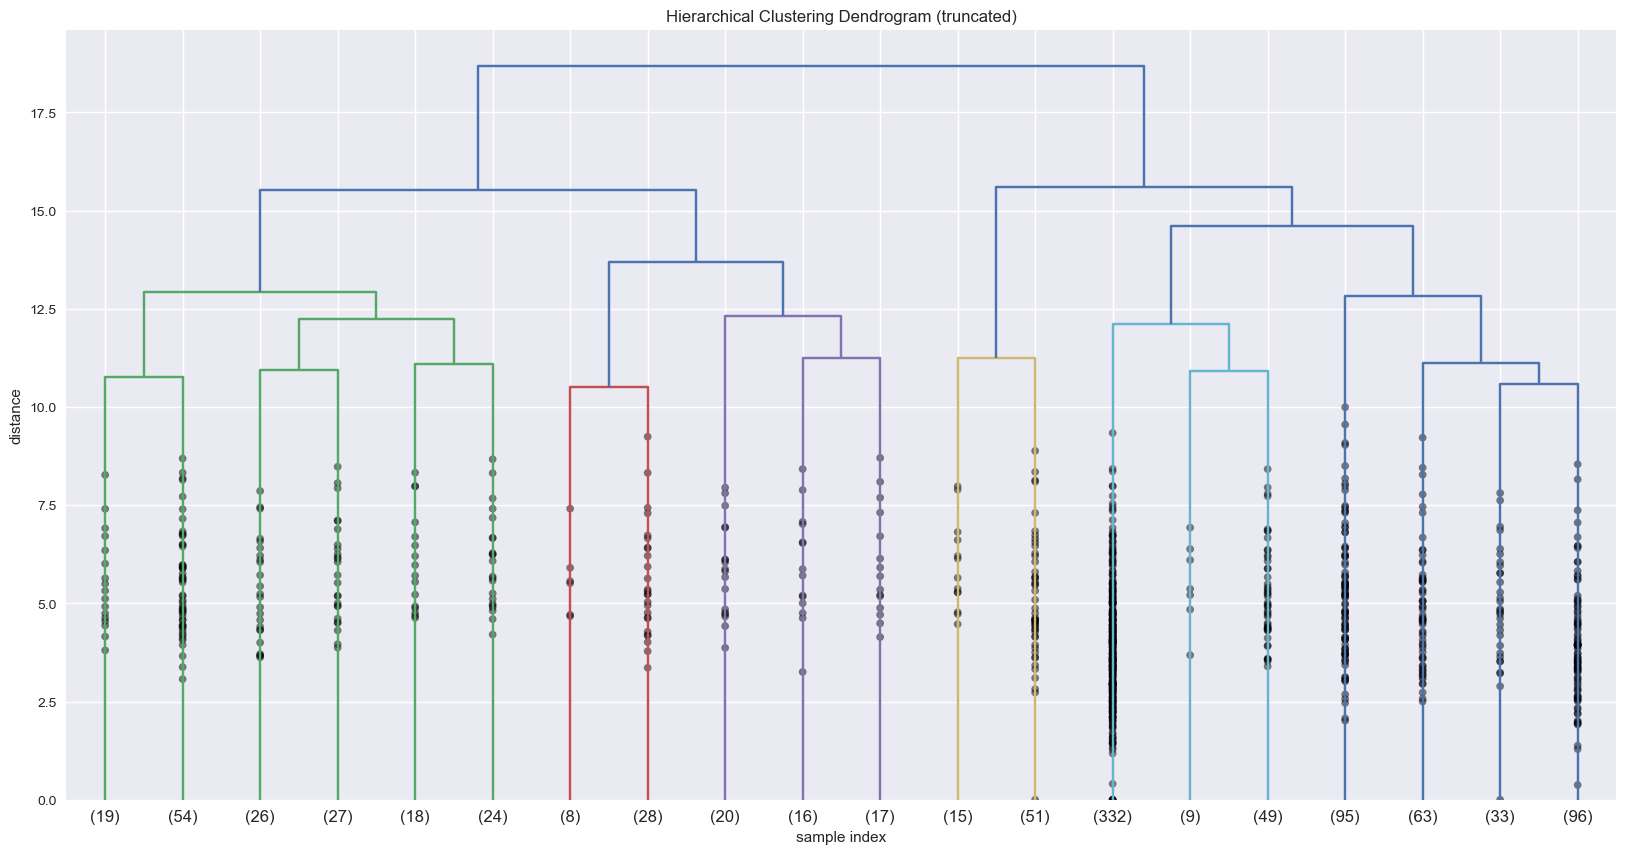

In [36]:
mergings = linkage(df_Abilitech_cluster_demo_scaled, method='complete')

plt.figure(figsize=(20,10))

plt.title('Hierarchical Clustering Dendrogram (truncated)')

plt.xlabel('sample index')

plt.ylabel('distance')

dendrogram(

    mergings,

    truncate_mode='lastp',

    p=20, 

    show_leaf_counts=True, 

    leaf_rotation=0.,

   leaf_font_size=12.,

    show_contracted=True,

    orientation='top'

)

plt.show()

In [37]:
from scipy.cluster.hierarchy import fcluster

In [38]:
Abilitech_hc = fcluster(mergings, 13.7, criterion='distance')
Abilitech_hc = pd.DataFrame(Abilitech_hc)
Abilitech_hc.columns = ['Predict_hc']
display(Abilitech_hc.head())
Abilitech_hc['Predict_hc'].value_counts()

,Predict_hc
0,4
1,2
2,5
3,1
4,4


4    390
5    287
1    168
2     89
3     66
Name: Predict_hc, dtype: int64

In [39]:
#Concatenate predicted cluster to the df_AbilitechQuote_cluster_sample data

results_hc= pd.concat([df_AbilitechQuote_cluster_sample, Abilitech_hc['Predict_hc']], axis=1)

In [40]:
results_hc.head()

,MQuotedTotalPayment,DriversActive,PolicyTerm,NamedInsuredAge,NamedInsuredDriverPoints,DriverNumber,DriverCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys,Predict_hc
0,454.0,1,12,34,0,1,1,7.0,7.0,8.0,10.0,1.0,7.0,1.0,11.0,2.0,2.0,5.0,5.0,1.0,2.0,3.0,14.0,15.0,15.0,8.0,4.0,4.0,6.0,5.0,10.0,2.0,8.0,17.0,11.0,18.0,14.0,1.0,10.0,6.0,13.0,2.0,18.0,4.0,3.0,2.0,4
1,1396.0,1,12,38,0,1,1,10.0,17.0,4.0,3.0,11.0,11.0,11.0,13.0,13.0,14.0,13.0,3.0,19.0,19.0,20.0,8.0,19.0,5.0,14.0,17.0,13.0,12.0,15.0,2.0,19.0,13.0,19.0,9.0,4.0,14.0,18.0,9.0,19.0,4.0,13.0,3.0,16.0,18.0,19.0,2
2,1026.0,1,6,47,0,1,1,5.0,3.0,4.0,8.0,4.0,4.0,3.0,19.0,3.0,1.0,7.0,2.0,8.0,6.0,13.0,3.0,8.0,14.0,2.0,17.0,6.0,3.0,15.0,12.0,8.0,2.0,9.0,14.0,4.0,19.0,8.0,3.0,3.0,10.0,2.0,2.0,4.0,8.0,15.0,5
3,1241.0,1,12,44,0,1,1,11.0,17.0,17.0,15.0,12.0,5.0,15.0,5.0,10.0,18.0,17.0,19.0,6.0,8.0,8.0,2.0,15.0,11.0,12.0,13.0,4.0,12.0,15.0,13.0,6.0,11.0,2.0,8.0,8.0,8.0,10.0,16.0,6.0,18.0,6.0,17.0,6.0,7.0,8.0,1
4,621.0,2,6,33,0,1,2,3.0,4.0,12.0,9.0,7.0,6.0,5.0,18.0,8.0,6.0,16.0,10.0,3.0,1.0,6.0,9.0,11.0,19.0,7.0,11.0,16.0,6.0,9.0,19.0,3.0,8.0,11.0,20.0,13.0,18.0,1.0,12.0,2.0,20.0,8.0,11.0,3.0,2.0,6.0,4


In [41]:
round(results_hc.groupby('Predict_hc').mean().T,2)

Predict_hc,1,2,3,4,5
MQuotedTotalPayment,1724.47,1462.88,1621.79,1522.59,1723.78
DriversActive,1.39,1.37,1.30,1.31,1.24
PolicyTerm,10.18,10.45,10.18,10.26,10.22
NamedInsuredAge,44.47,44.87,40.74,37.26,37.30
NamedInsuredDriverPoints,1.96,1.28,1.38,1.33,1.49
DriverNumber,1.00,1.01,1.02,1.02,1.02
DriverCount,2.05,1.87,1.86,1.76,1.69
Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,11.89,15.63,7.42,5.44,7.47
Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,10.53,14.03,11.71,5.86,7.75
Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,13.29,14.88,9.29,10.67,9.85


This table provides insights into the behaviors of different customer segments, each with distinct spending patterns, influenced by advertising, and lifestyle preferences (e.g., dining out). Group 1 and Group 5 have customers with higher quoted payments and tend to spend more. They may represent older, wealthier customers with more drivers per policy. Group 3 and Group 4  have moderate payment values. Group 2 has the youngest insured policyholders and the lowest quoted payments.

In [42]:
selected_columns = results_hc.iloc[:, 7:19]
grouped_mean = selected_columns.groupby(results_hc['Predict_hc']).mean()
influenced_mean = grouped_mean.mean(axis=1)
influenced_mean = round(influenced_mean, 2).T
influenced_mean

Predict_hc
1    11.36
2    13.82
3     9.08
4     8.55
5     7.98
dtype: float64

Groups 1 and 2 customers are more influenced by advertising, special offers, technology, and fashionable styles, as they have higher average scores. These customers may be more responsive to marketing efforts, and the General Insurance could consider targeting them with personalized ads or exclusive offers. Groups 4 and 5 customers are less influenced by these factors. The company might need different strategies to reach these customers, such as focusing on price sensitivity, product quality, or loyalty programs instead of marketing or special offers.

In [43]:
selected_columns = results_hc.iloc[:, 19:46]
grouped_mean = selected_columns.groupby(results_hc['Predict_hc']).mean()
out_of_home_mean = grouped_mean.mean(axis=1)
out_of_home_mean = round(out_of_home_mean, 2).T
out_of_home_mean

Predict_hc
1    10.21
2    12.62
3    11.44
4     8.17
5     8.33
dtype: float64

Groups 2 and 3, with higher scores for eating out, could be exposed to higher health-related risks. Frequent dining out could lead to poorer dietary choices, which may increase the risk of obesity, heart disease, diabetes, or other health issues. These groups may be considered slightly higher risk in terms of health or accident claims, especially for health-related insurance policies. Groups 4 and 5, with lower average scores, may represent customers who eat out less often. These customers may lead more sedentary or home-based lifestyles, potentially resulting in lower exposure to certain risks (e.g., fewer accidents, less exposure to unhealthy food). hese groups might be seen as lower risk due to their lifestyle habits, and thus, they could benefit from lower premiums or more favorable insurance conditions, particularly in health insurance or accident policies.

In [44]:
pd.crosstab(results_hc['DriversActive'], results_hc['Predict_hc'])

Predict_hc,1,2,3,4,5
DriversActive,,,,,
1,113,62,49,281,230
2,45,22,14,100,47
3,10,4,3,6,9
4,0,1,0,3,0
5,0,0,0,0,1


Most of the customers, precisely 113, in Group 1 have 1 active driver. Group 4 have 281 in the 1 active driver category, and 100 in 2 active driver category. Only Group 5 as a customer (which is one) in the 5 active driver category. This generally hows that most customers across groups have 1 active driver, but Group 4 has the highest concentration of 1-driver policies.

In [45]:
pd.crosstab(results_hc['PolicyTerm'], results_hc['Predict_hc'])

Predict_hc,1,2,3,4,5
PolicyTerm,,,,,
6,51,23,20,113,85
12,117,66,46,277,202


Most customers in Group 1, 4 and 5 have the 12-month policy term, while Cluster 4 has the highest concentration of 6-month policies.

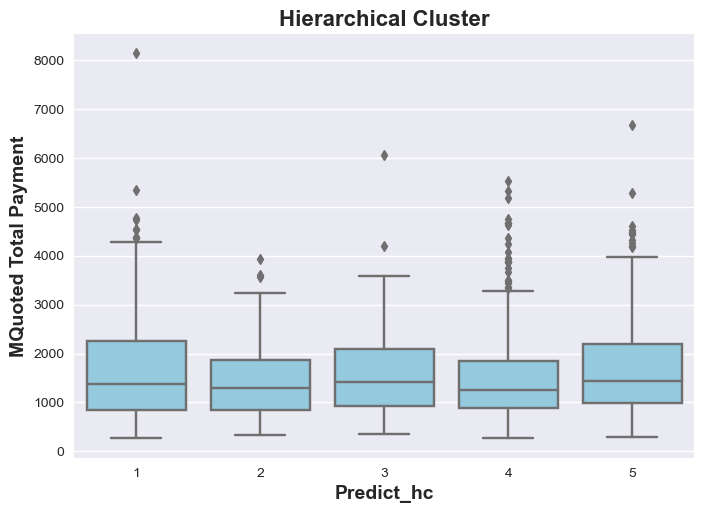

In [46]:
plt.title('Hierarchical Cluster', fontweight='bold', fontsize=16, horizontalalignment='center')
sns.boxplot(y='MQuotedTotalPayment', x='Predict_hc', data=results_hc, color='skyblue')
plt.xlabel('Predict_hc', fontweight='bold', fontsize=14)
plt.ylabel('MQuoted Total Payment', fontweight='bold', fontsize=14)
plt.show();

This boxplot shows that Group 1 and Group 5 have the highest median quoted payments, and both have many outliers, indicating that some customers pay significantly more than others. This plot helps understand customers' financial distribution across the groups, particularly highlighting where high payments occur. Groups 1 and 5 might represent customers with more expensive policies, while Groups 2 and 3 are more uniform in terms of payment amounts.

## Modeling for predicting MQuotedTotalPayment

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import mean_squared_error, r2_score

In [48]:
#AbilitechQuote = AbilitechQuote_cluster.copy()

In [49]:
#merge df_MasterQuote with df_Abilitech to create AbilitechQuote

AbilitechQuote = pd.merge(df_MasterQuote, df_Abilitech, how='inner', on='AbilitecContactID')

In [50]:
#show top rows of AbilitechQuote

AbilitechQuote.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,DsDwellingDescription,DsMultiCarDescription,NamedInsuredAge,NamedInsuredDriverPoints,DriverNumber,AbilitecContactID,AbilitecHouseholdID,DriverCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,1/2/16 22:25,1/2/16 0:00,1/2/17 0:00,No Dwelling Discount,No Multi-Car Discount,40,0,1,04ZJUS0220X4MKG7,04ZJUS033FV1YJP0,1,7.0,1.0,14,1.0,1.0,15.0,1.0,9.0,2.0,10,7.0,19,1.0,2.0,4.0,13.0,13.0,5.0,4.0,1.0,10.0,7.0,5.0,10.0,4.0,7.0,2.0,11.0,9.0,12.0,1.0,14.0,8.0,10.0,1.0,13.0,1.0,1.0,8.0
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,1/3/16 12:15,1/3/16 0:00,1/3/17 0:00,No Dwelling Discount,No Multi-Car Discount,44,0,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,1,5.0,15.0,11,7.0,3.0,2.0,6.0,14.0,7.0,3,14.0,20,6.0,3.0,9.0,7.0,6.0,11.0,9.0,12.0,18.0,10.0,10.0,11.0,7.0,10.0,10.0,16.0,13.0,15.0,9.0,9.0,2.0,14.0,8.0,10.0,5.0,14.0,9.0
2,MzM0MzEyNzc=,639.0,BI NOFC,Liability Only,1,IL,Divorced,SUwyNzE3MzA4,IL,12,1/4/16 17:45,1/4/16 0:00,1/4/17 0:00,No Dwelling Discount,No Multi-Car Discount,44,1,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,1,5.0,15.0,11,7.0,3.0,2.0,6.0,14.0,7.0,3,14.0,20,6.0,3.0,9.0,7.0,6.0,11.0,9.0,12.0,18.0,10.0,10.0,11.0,7.0,10.0,10.0,16.0,13.0,15.0,9.0,9.0,2.0,14.0,8.0,10.0,5.0,14.0,9.0
3,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,1/4/16 11:10,1/4/16 0:00,1/4/17 0:00,No Dwelling Discount,No Multi-Car Discount,42,0,1,04ZJUS01KNTMYEQF,04ZJUS03X6MXZ21T,2,14.0,6.0,13,9.0,9.0,9.0,11.0,12.0,7.0,7,9.0,12,3.0,9.0,10.0,9.0,11.0,14.0,8.0,13.0,11.0,11.0,13.0,15.0,7.0,10.0,11.0,13.0,7.0,13.0,2.0,4.0,7.0,11.0,8.0,5.0,9.0,3.0,12.0
4,NDA4MDkzNjM=,1586.0,BI NOFC,Liability Only,2,NV,Married,NaN,NV,12,2/10/17 11:07,2/10/17 0:00,2/10/18 0:00,No Dwelling Discount,Multi-Car Discount,43,0,1,04ZJUS01KNTMYEQF,04ZJUS03X6MXZ21T,2,14.0,6.0,13,9.0,9.0,9.0,11.0,12.0,7.0,7,9.0,12,3.0,9.0,10.0,9.0,11.0,14.0,8.0,13.0,11.0,11.0,13.0,15.0,7.0,10

In [51]:
AbilitechQuote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32122 entries, 0 to 32121
Data columns (total 60 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   QuoteNumber                                                                       32122 non-null  object 
 1   MQuotedTotalPayment                                                               32122 non-null  float64
 2   BiFcCoverageInd                                                                   32122 non-null  object 
 3   CoverageTypeDescription                                                           32122 non-null  object 
 4   DriversActive                                                                     32122 non-null  int64  
 5   GaragingState                                                                     32122 non-null  object 
 6 

In [52]:
#summary statistics

AbilitechQuote.describe()

,MQuotedTotalPayment,DriversActive,PolicyTerm,NamedInsuredAge,NamedInsuredDriverPoints,DriverNumber,DriverCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys
count,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000,32122.000000
mean,1567.443713,1.306986,9.802814,39.303312,1.437737,1.042681,1.766640,8.172312,8.078202,11.392130,8.063290,7.521325,9.497229,7.570170,12.206152,7.762655,7.913642,11.715709,11.625459,6.675238,7.257674,8.052581,9.518772,9.279154,12.430671,7.971546,9.019270,9.965351,8.247556,9.221530,11.334724,7.195256,8.097130,10.445769,11.064037,10.697341,11.513355,6.919681,10.000467,8.077859,11.749455,8.126922,10.456478,7.062885,6.875630,8.465600
std,1245.775719,0.556449,2.890631,12.789755,2.787884,0.243113,1.227427,5.144442,5.067145,5.122948,5.010522,5.004540,5.274249,4.885655,5.382539,5.013429,5.069034,4.973752,5.753865,4.943238,5.239063,4.928151,4.822987,4.766644,4.653767,5.011403,4.953999,5.589678,5.149801,4.939765,5.037047,4.716037,5.230144,4.779839,4.990004,5.078726,4.725571,4.986495,5.153921,5.595155,5.045324,4.803403,5.057620,5.037857,5.177501,4.930173
min,0.000000,1.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,794.792500,1.000000,6.000000,29.000000,0.000000,1.000000,1.000000,4.000000,4.000000,7.000000,4.000000,4.000000,5.000000,3.000000,8.0000

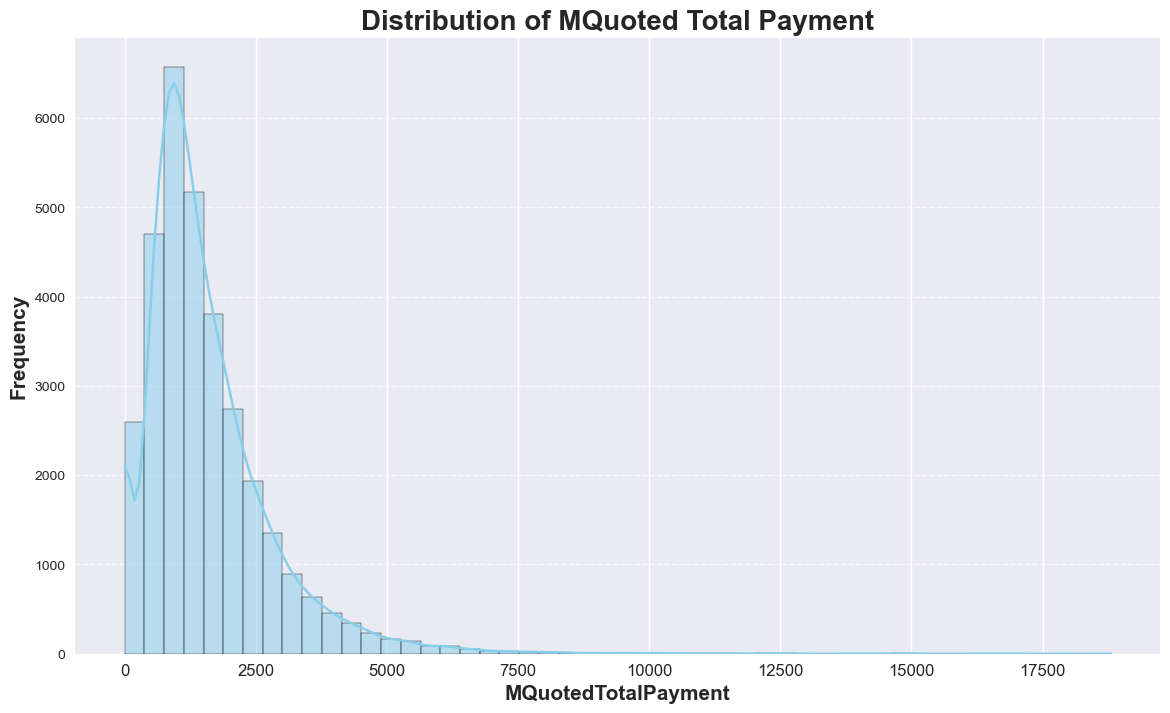

In [53]:
plt.figure(figsize=(14, 8))

# Plot the histogram with KDE (Kernel Density Estimate)
ax = sns.histplot(AbilitechQuote['MQuotedTotalPayment'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of MQuoted Total Payment', fontweight='bold', fontsize=20, horizontalalignment='center')
plt.xlabel('MQuotedTotalPayment', fontweight='bold', fontsize=15, horizontalalignment='center')
plt.ylabel('Frequency', fontweight='bold', fontsize=15, horizontalalignment='center')

plt.xticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show();

This graph shows the distribution of quoted total payments (MQuotedTotalPayment). Most quotes are in the lower range. As the quoted payment increases, the frequency of quotes decreases. Only a few quotes exceed 7,500. This indicates that The General Insurance company handles many small claims.

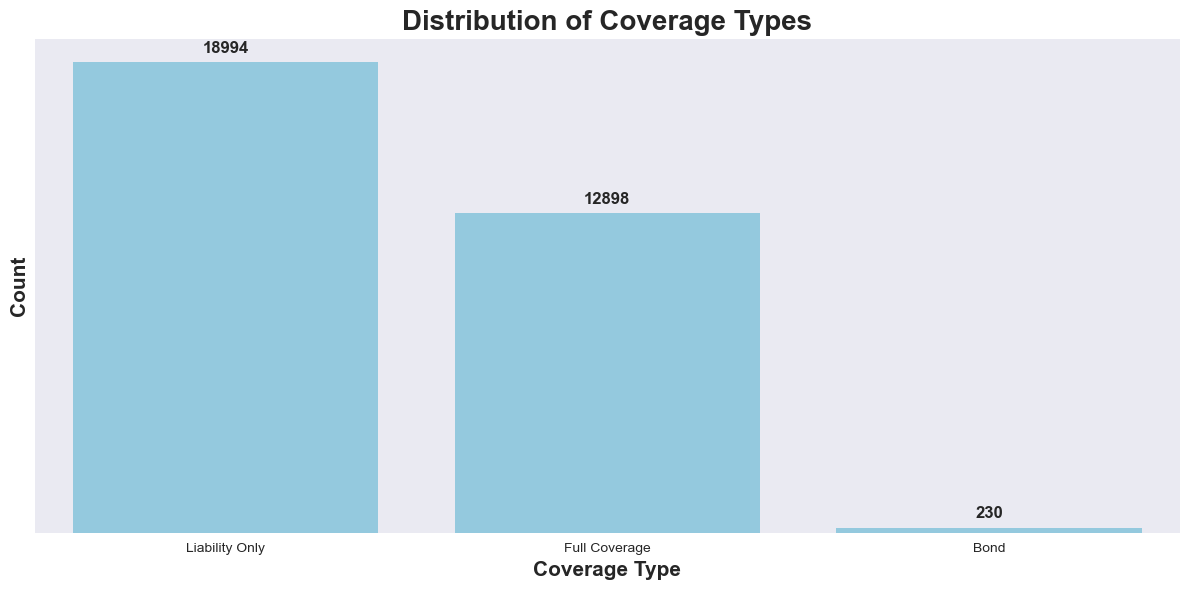

In [54]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(x=AbilitechQuote['CoverageTypeDescription'].value_counts().index, y=AbilitechQuote['CoverageTypeDescription'].value_counts().values, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points',
                fontsize=12, fontweight='bold')

plt.title('Distribution of Coverage Types', fontweight='bold', fontsize=20, horizontalalignment='center')
plt.xlabel('Coverage Type', fontweight='bold', fontsize=15, horizontalalignment='center')
plt.ylabel('Count', fontweight='bold', fontsize=15, horizontalalignment='center')

ax.set_yticks([])
#plt.xticks(rotation=45)

plt.tight_layout()
plt.show();

This graph shows that most of The General Insurance customers choose liability-only coverage, followed by full coverage, and very few go for bond coverage. This can help them to understand which products are most popular.

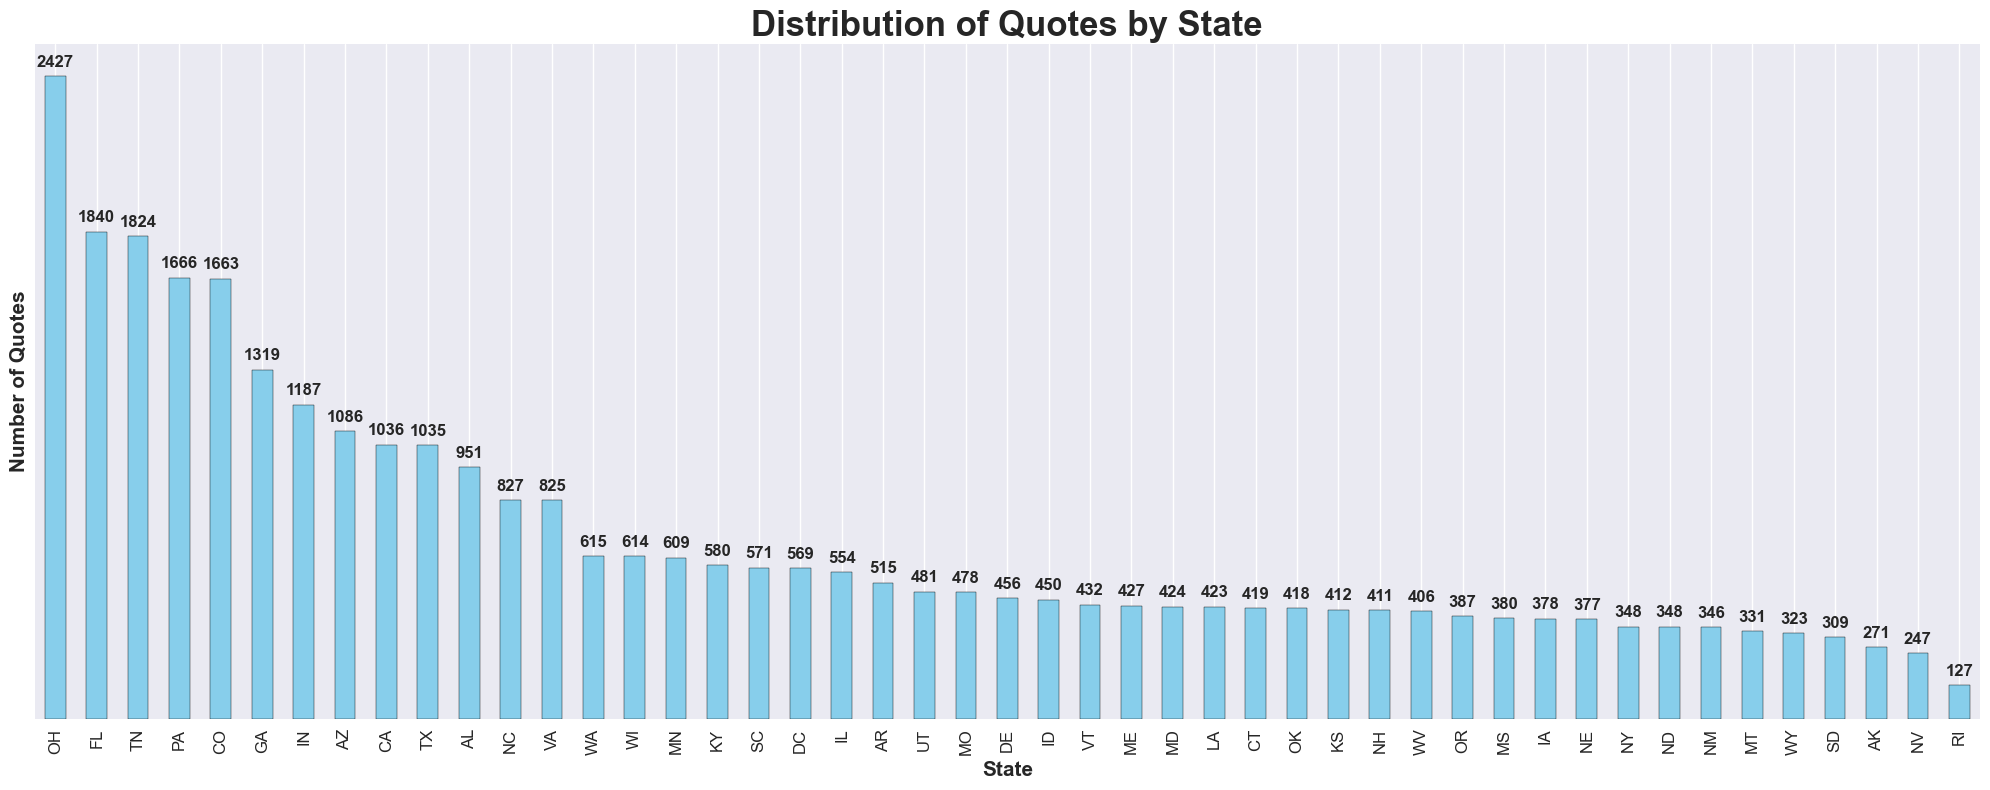

In [55]:
plt.figure(figsize=(20, 8))

ax = AbilitechQuote['PolicyStateCode'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points',
                fontsize=12, fontweight='bold')

plt.title('Distribution of Quotes by State', fontweight='bold', fontsize=25, horizontalalignment='center')
plt.xlabel('State', fontweight='bold', fontsize=15, horizontalalignment='center')
plt.ylabel('Number of Quotes', fontweight='bold', fontsize=15, horizontalalignment='center')

plt.xticks(rotation=90, fontsize=12)

ax.set_yticks([])

plt.tight_layout()
plt.show()

This graph shows the distribution of the number of quotes by state. Ohio has the highest number of quotes at 2,427, followed by Tennessee, Florida, and Colorado. Rhode Island has the fewest at 127.

In [56]:
#outliers handling
#using IQR to calculate the outlier for price

Q1 = AbilitechQuote['MQuotedTotalPayment'].quantile(0.25)
Q3 = AbilitechQuote['MQuotedTotalPayment'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

AbilitechQuote = AbilitechQuote[(AbilitechQuote['MQuotedTotalPayment'] >= lower_bound) & (AbilitechQuote['MQuotedTotalPayment'] <= upper_bound)]

In [57]:
#show the unique counts of the categorical variables

cat_columns = ['BiFcCoverageInd', 'CoverageTypeDescription', 'GaragingState', 'NamedInsuredMaritalStatus', 'PolicyStateCode', 'DsDwellingDescription', 'DsMultiCarDescription']

unique_counts = AbilitechQuote[cat_columns].nunique()

print(unique_counts)

BiFcCoverageInd               4
CoverageTypeDescription       3
GaragingState                47
NamedInsuredMaritalStatus     7
PolicyStateCode              47
DsDwellingDescription         3
DsMultiCarDescription         2
dtype: int64


For this encoding, I will not include 'GaragingState,' 'PolicyStateCode,' and 'DsMultiCarDescription.' This is as a result of the curse of dimensionality. I'd exclude GaragingState and PolicyStateCode variables for label encoding to avoid poor generalization. Also, I'd exclude DsMultiCarDescription because it adds little or no value to the modeling due to its very low distinct count.

In [58]:
#create a dummy for BiFcCoverageInd

#Find the highest count category
df_dummy = pd.DataFrame(AbilitechQuote['BiFcCoverageInd'].value_counts().reset_index())
var_dummy = df_dummy.iloc[0, 0]

#Create dummy variables
dummies = pd.get_dummies(AbilitechQuote['BiFcCoverageInd'], drop_first = True, prefix='cov').astype('int64')

#Concat the dummy variables to the main dataset
AbilitechQuote = pd.concat([AbilitechQuote, dummies], axis = 1)

#Display the variables and new dataset
display(df_dummy)
print("----------------------")
print("Highest Count:")
print(var_dummy)
print("----------------------")

display(dummies.head())
AbilitechQuote.head()

,index,BiFcCoverageInd
0,BI NOFC,16591
1,BI FC,11254
2,NOBI NOFC,2476
3,NOBI FC,232


----------------------
Highest Count:
BI NOFC
----------------------


,cov_BI NOFC,cov_NOBI FC,cov_NOBI NOFC
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,DsDwellingDescription,DsMultiCarDescription,NamedInsuredAge,NamedInsuredDriverPoints,DriverNumber,AbilitecContactID,AbilitecHouseholdID,DriverCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys,cov_BI NOFC,cov_NOBI FC,cov_NOBI NOFC
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,1/2/16 22:25,1/2/16 0:00,1/2/17 0:00,No Dwelling Discount,No Multi-Car Discount,40,0,1,04ZJUS0220X4MKG7,04ZJUS033FV1YJP0,1,7.0,1.0,14,1.0,1.0,15.0,1.0,9.0,2.0,10,7.0,19,1.0,2.0,4.0,13.0,13.0,5.0,4.0,1.0,10.0,7.0,5.0,10.0,4.0,7.0,2.0,11.0,9.0,12.0,1.0,14.0,8.0,10.0,1.0,13.0,1.0,1.0,8.0,1,0,0
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,1/3/16 12:15,1/3/16 0:00,1/3/17 0:00,No Dwelling Discount,No Multi-Car Discount,44,0,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,1,5.0,15.0,11,7.0,3.0,2.0,6.0,14.0,7.0,3,14.0,20,6.0,3.0,9.0,7.0,6.0,11.0,9.0,12.0,18.0,10.0,10.0,11.0,7.0,10.0,10.0,16.0,13.0,15.0,9.0,9.0,2.0,14.0,8.0,10.0,5.0,14.0,9.0,0,0,1
2,MzM0MzEyNzc=,639.0,BI NOFC,Liability Only,1,IL,Divorced,SUwyNzE3MzA4,IL,12,1/4/16 17:45,1/4/16 0:00,1/4/17 0:00,No Dwelling Discount,No Multi-Car Discount,44,1,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,1,5.0,15.0,11,7.0,3.0,2.0,6.0,14.0,7.0,3,14.0,20,6.0,3.0,9.0,7.0,6.0,11.0,9.0,12.0,18.0,10.0,10.0,11.0,7.0,10.0,10.0,16.0,13.0,15.0,9.0,9.0,2.0,14.0,8.0,10.0,5.0,14.0,9.0,1,0,0
3,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,1/4/16 11:10,1/4/16 0:00,1/4/17 0:00,No Dwelling Discount,No Multi-Car Discount,42,0,1,04ZJUS01KNTMYEQF,04ZJUS03X6MXZ21T,2,14.0,6.0,13,9.0,9.0,9.0,11.0,12.0,7.0,7,9.0,12,3.0,9.0,10.0,9.0,11.0,14.0,8.0,13.0,11.0,11.0,13.0,15.0,7.0,10.0,11.0,13.0,7.0,13.0,2.0,4.0,7.0,11.0,8.0,5.0,9.0,3.0,12.0,1,0,0
4,NDA4MDkzNjM=,1586.0,BI NOFC,Liability Only,2,NV,Married,NaN,NV,12,2/10/17 11:07,2/10/17 0:00,2/10/18 0:00,No Dwelling Discount,Multi-Car Discount,43,0,1,04ZJUS01KNTMYEQF,04ZJUS03X6MXZ21T,2,14.0,6.0,13,9.0,9.0,9.0,11.0,12.0,7.0,7,9.0,12,

In [59]:
#create a dummy for CoverageTypeDescription

#Find the highest count category
df_dummy = pd.DataFrame(AbilitechQuote['CoverageTypeDescription'].value_counts().reset_index())
var_dummy = df_dummy.iloc[0, 0]

#Create dummy variables
dummies = pd.get_dummies(AbilitechQuote['CoverageTypeDescription'], drop_first = True, prefix='covType').astype('int64')

#Concat the dummy variables to the main dataset
AbilitechQuote = pd.concat([AbilitechQuote, dummies], axis = 1)

#Display the variables and new dataset
display(df_dummy)
print("----------------------")
print("Highest Count:")
print(var_dummy)
print("----------------------")

display(dummies.head())
AbilitechQuote.head()

,index,CoverageTypeDescription
0,Liability Only,18837
1,Full Coverage,11486
2,Bond,230


----------------------
Highest Count:
Liability Only
----------------------


,covType_Full Coverage,covType_Liability Only
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,DsDwellingDescription,DsMultiCarDescription,NamedInsuredAge,NamedInsuredDriverPoints,DriverNumber,AbilitecContactID,AbilitecHouseholdID,DriverCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys,cov_BI NOFC,cov_NOBI FC,cov_NOBI NOFC,covType_Full Coverage,covType_Liability Only
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,1/2/16 22:25,1/2/16 0:00,1/2/17 0:00,No Dwelling Discount,No Multi-Car Discount,40,0,1,04ZJUS0220X4MKG7,04ZJUS033FV1YJP0,1,7.0,1.0,14,1.0,1.0,15.0,1.0,9.0,2.0,10,7.0,19,1.0,2.0,4.0,13.0,13.0,5.0,4.0,1.0,10.0,7.0,5.0,10.0,4.0,7.0,2.0,11.0,9.0,12.0,1.0,14.0,8.0,10.0,1.0,13.0,1.0,1.0,8.0,1,0,0,0,1
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,1/3/16 12:15,1/3/16 0:00,1/3/17 0:00,No Dwelling Discount,No Multi-Car Discount,44,0,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,1,5.0,15.0,11,7.0,3.0,2.0,6.0,14.0,7.0,3,14.0,20,6.0,3.0,9.0,7.0,6.0,11.0,9.0,12.0,18.0,10.0,10.0,11.0,7.0,10.0,10.0,16.0,13.0,15.0,9.0,9.0,2.0,14.0,8.0,10.0,5.0,14.0,9.0,0,0,1,0,1
2,MzM0MzEyNzc=,639.0,BI NOFC,Liability Only,1,IL,Divorced,SUwyNzE3MzA4,IL,12,1/4/16 17:45,1/4/16 0:00,1/4/17 0:00,No Dwelling Discount,No Multi-Car Discount,44,1,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,1,5.0,15.0,11,7.0,3.0,2.0,6.0,14.0,7.0,3,14.0,20,6.0,3.0,9.0,7.0,6.0,11.0,9.0,12.0,18.0,10.0,10.0,11.0,7.0,10.0,10.0,16.0,13.0,15.0,9.0,9.0,2.0,14.0,8.0,10.0,5.0,14.0,9.0,1,0,0,0,1
3,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,1/4/16 11:10,1/4/16 0:00,1/4/17 0:00,No Dwelling Discount,No Multi-Car Discount,42,0,1,04ZJUS01KNTMYEQF,04ZJUS03X6MXZ21T,2,14.0,6.0,13,9.0,9.0,9.0,11.0,12.0,7.0,7,9.0,12,3.0,9.0,10.0,9.0,11.0,14.0,8.0,13.0,11.0,11.0,13.0,15.0,7.0,10.0,11.0,13.0,7.0,13.0,2.0,4.0,7.0,11.0,8.0,5.0,9.0,3.0,12.0,1,0,0,0,1
4,NDA4MDkzNjM=,1586.0,BI NOFC,Liability Only,2,NV,Married,NaN,NV,12,2/10/17 11:07,2/10/17 0:00,2/10/18 0:00,No Dwelling Discount,Multi-Car Discount,43,0,1,04ZJUS01KNTMYEQF,04ZJU

In [60]:
#create a dummy for DsDwellingDescription

#Find the highest count category
df_dummy = pd.DataFrame(AbilitechQuote['DsDwellingDescription'].value_counts().reset_index())
var_dummy = df_dummy.iloc[0, 0]

#Create dummy variables
dummies = pd.get_dummies(AbilitechQuote['DsDwellingDescription'], drop_first = True, prefix='dwell').astype('int64')

#Concat the dummy variables to the main dataset
AbilitechQuote = pd.concat([AbilitechQuote, dummies], axis = 1)

#Display the variables and new dataset
display(df_dummy)
print("----------------------")
print("Highest Count:")
print(var_dummy)
print("----------------------")

display(dummies.head())
AbilitechQuote.head()

,index,DsDwellingDescription
0,No Dwelling Discount,25286
1,Homeowner-Needs Proof(hn),3393
2,Homeowner-No Proof Required,1874


----------------------
Highest Count:
No Dwelling Discount
----------------------


,dwell_Homeowner-No Proof Required,dwell_No Dwelling Discount
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,DsDwellingDescription,DsMultiCarDescription,NamedInsuredAge,NamedInsuredDriverPoints,DriverNumber,AbilitecContactID,AbilitecHouseholdID,DriverCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys,cov_BI NOFC,cov_NOBI FC,cov_NOBI NOFC,covType_Full Coverage,covType_Liability Only,dwell_Homeowner-No Proof Required,dwell_No Dwelling Discount
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,1/2/16 22:25,1/2/16 0:00,1/2/17 0:00,No Dwelling Discount,No Multi-Car Discount,40,0,1,04ZJUS0220X4MKG7,04ZJUS033FV1YJP0,1,7.0,1.0,14,1.0,1.0,15.0,1.0,9.0,2.0,10,7.0,19,1.0,2.0,4.0,13.0,13.0,5.0,4.0,1.0,10.0,7.0,5.0,10.0,4.0,7.0,2.0,11.0,9.0,12.0,1.0,14.0,8.0,10.0,1.0,13.0,1.0,1.0,8.0,1,0,0,0,1,0,1
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,1/3/16 12:15,1/3/16 0:00,1/3/17 0:00,No Dwelling Discount,No Multi-Car Discount,44,0,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,1,5.0,15.0,11,7.0,3.0,2.0,6.0,14.0,7.0,3,14.0,20,6.0,3.0,9.0,7.0,6.0,11.0,9.0,12.0,18.0,10.0,10.0,11.0,7.0,10.0,10.0,16.0,13.0,15.0,9.0,9.0,2.0,14.0,8.0,10.0,5.0,14.0,9.0,0,0,1,0,1,0,1
2,MzM0MzEyNzc=,639.0,BI NOFC,Liability Only,1,IL,Divorced,SUwyNzE3MzA4,IL,12,1/4/16 17:45,1/4/16 0:00,1/4/17 0:00,No Dwelling Discount,No Multi-Car Discount,44,1,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,1,5.0,15.0,11,7.0,3.0,2.0,6.0,14.0,7.0,3,14.0,20,6.0,3.0,9.0,7.0,6.0,11.0,9.0,12.0,18.0,10.0,10.0,11.0,7.0,10.0,10.0,16.0,13.0,15.0,9.0,9.0,2.0,14.0,8.0,10.0,5.0,14.0,9.0,1,0,0,0,1,0,1
3,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,1/4/16 11:10,1/4/16 0:00,1/4/17 0:00,No Dwelling Discount,No Multi-Car Discount,42,0,1,04ZJUS01KNTMYEQF,04ZJUS03X6MXZ21T,2,14.0,6.0,13,9.0,9.0,9.0,11.0,12.0,7.0,7,9.0,12,3.0,9.0,10.0,9.0,11.0,14.0,8.0,13.0,11.0,11.0,13.0,15.0,7.0,10.0,11.0,13.0,7.0,13.0,2.0,4.0,7.0,11.0,8.0,5.0,9.0,3.0,12.0,1,0,0,0,1,0,1
4,NDA4MDkzNjM=,1586.0,BI NOFC,Liability Only,2,NV,Married,NaN,NV,12,2/10/17 11:07,2/10/17 0:00,2/10/

In [61]:
AbilitechQuote['NamedInsuredMaritalStatus'].value_counts()

Single              17656
Married              7426
Divorced             3270
Separated            1549
Widowed               641
Domestic Partner        6
Civil Union             5
Name: NamedInsuredMaritalStatus, dtype: int64

In [62]:
#replace NamedInsuredMaritalStatus values for numerical values

AbilitechQuote['NamedInsuredMaritalStatus'] = AbilitechQuote['NamedInsuredMaritalStatus'].rename({'Single': 0, 'Married':1, "Divorced":2, 'Separated': 3, 'Widowed':4, "Domestic Partner":5, "Civil Union":6})

In [63]:
def term(a):
    if a['PolicyTerm'] == 6:
        return 0
    else:
        return 1
    
AbilitechQuote['PolicyTerm'] = AbilitechQuote.apply(term, axis = 1)

In [64]:
AbilitechQuote.head(3)

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,DsDwellingDescription,DsMultiCarDescription,NamedInsuredAge,NamedInsuredDriverPoints,DriverNumber,AbilitecContactID,AbilitecHouseholdID,DriverCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys,cov_BI NOFC,cov_NOBI FC,cov_NOBI NOFC,covType_Full Coverage,covType_Liability Only,dwell_Homeowner-No Proof Required,dwell_No Dwelling Discount
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,1,1/2/16 22:25,1/2/16 0:00,1/2/17 0:00,No Dwelling Discount,No Multi-Car Discount,40,0,1,04ZJUS0220X4MKG7,04ZJUS033FV1YJP0,1,7.0,1.0,14,1.0,1.0,15.0,1.0,9.0,2.0,10,7.0,19,1.0,2.0,4.0,13.0,13.0,5.0,4.0,1.0,10.0,7.0,5.0,10.0,4.0,7.0,2.0,11.0,9.0,12.0,1.0,14.0,8.0,10.0,1.0,13.0,1.0,1.0,8.0,1,0,0,0,1,0,1
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,1,1/3/16 12:15,1/3/16 0:00,1/3/17 0:00,No Dwelling Discount,No Multi-Car Discount,44,0,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,1,5.0,15.0,11,7.0,3.0,2.0,6.0,14.0,7.0,3,14.0,20,6.0,3.0,9.0,7.0,6.0,11.0,9.0,12.0,18.0,10.0,10.0,11.0,7.0,10.0,10.0,16.0,13.0,15.0,9.0,9.0,2.0,14.0,8.0,10.0,5.0,14.0,9.0,0,0,1,0,1,0,1
2,MzM0MzEyNzc=,639.0,BI NOFC,Liability Only,1,IL,Divorced,SUwyNzE3MzA4,IL,1,1/4/16 17:45,1/4/16 0:00,1/4/17 0:00,No Dwelling Discount,No Multi-Car Discount,44,1,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,1,5.0,15.0,11,7.0,3.0,2.0,6.0,14.0,7.0,3,14.0,20,6.0,3.0,9.0,7.0,6.0,11.0,9.0,12.0,18.0,10.0,10.0,11.0,7.0,10.0,10.0,16.0,13.0,15.0,9.0,9.0,2.0,14.0,8.0,10.0,5.0,14.0,9.0,1,0,0,0,1,0,1


In [65]:
AbilitechQuote = AbilitechQuote.drop(['QuoteNumber', 'BiFcCoverageInd', 'CoverageTypeDescription', 'DsDwellingDescription', 'GaragingState', 'PolicyNumber', 'PolicyStateCode', 'QuoteInitiatedTime',\
                                     'TermEffectiveDate', 'TermExpirationDate', 'DsMultiCarDescription', 'NamedInsuredMaritalStatus', 'DsMultiCarDescription', 'AbilitecContactID', 'AbilitecHouseholdID'], axis=1)

In [66]:
AbilitechQuote.head()

,MQuotedTotalPayment,DriversActive,PolicyTerm,NamedInsuredAge,NamedInsuredDriverPoints,DriverNumber,DriverCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys,cov_BI NOFC,cov_NOBI FC,cov_NOBI NOFC,covType_Full Coverage,covType_Liability Only,dwell_Homeowner-No Proof Required,dwell_No Dwelling Discount
0,1136.0,1,1,40,0,1,1,7.0,1.0,14,1.0,1.0,15.0,1.0,9.0,2.0,10,7.0,19,1.0,2.0,4.0,13.0,13.0,5.0,4.0,1.0,10.0,7.0,5.0,10.0,4.0,7.0,2.0,11.0,9.0,12.0,1.0,14.0,8.0,10.0,1.0,13.0,1.0,1.0,8.0,1,0,0,0,1,0,1
1,0.0,1,1,44,0,1,1,5.0,15.0,11,7.0,3.0,2.0,6.0,14.0,7.0,3,14.0,20,6.0,3.0,9.0,7.0,6.0,11.0,9.0,12.0,18.0,10.0,10.0,11.0,7.0,10.0,10.0,16.0,13.0,15.0,9.0,9.0,2.0,14.0,8.0,10.0,5.0,14.0,9.0,0,0,1,0,1,0,1
2,639.0,1,1,44,1,1,1,5.0,15.0,11,7.0,3.0,2.0,6.0,14.0,7.0,3,14.0,20,6.0,3.0,9.0,7.0,6.0,11.0,9.0,12.0,18.0,10.0,10.0,11.0,7.0,10.0,10.0,16.0,13.0,15.0,9.0,9.0,2.0,14.0,8.0,10.0,5.0,14.0,9.0,1,0,0,0,1,0,1
3,1160.0,2,1,42,0,1,2,14.0,6.0,13,9.0,9.0,9.0,11.0,12.0,7.0,7,9.0,12,3.0,9.0,10.0,9.0,11.0,14.0,8.0,13.0,11.0,11.0,13.0,15.0,7.0,10.0,11.0,13.0,7.0,13.0,2.0,4.0,7.0,11.0,8.0,5.0,9.0,3.0,12.0,1,0,0,0,1,0,1
4,1586.0,2,1,43,0,1,2,14.0,6.0,13,9.0,9.0,9.0,11.0,12.0,7.0,7,9.0,12,3.0,9.0,10.0,9.0,11.0,14.0,8.0,13.0,11.0,11.0,13.0,15.0,7.0,10.0,11.0,13.0,7.0,13.0,2.0,4.0,7.0,11.0,8.0,5.0,9.0,3.0,12.0,1,0,0,0,1,0,1


### Ridge Regression

In [67]:
#create X and y variables for lasso regression 
X = AbilitechQuote.drop('MQuotedTotalPayment', axis=1)

y = AbilitechQuote['MQuotedTotalPayment'].values.reshape(-1, 1) 

In [68]:
#normalize the data using StandardScaler

scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
#split data into 70 training set and 30% test set

X_train, X_test, y_train, y_test = train_test_split(X_reg_scaled,y, test_size=0.3, random_state=42)

In [71]:
print('---------------------------------------------------------------')
print('y training set' + str(y_train.shape))
print('y test set' + str(y_test.shape))
print('Shape of y' + str(y.shape))
print('---------------------------------------------------------------')
print('***************************************************************')
print('X training set' + str(X_train.shape))
print('X test set' + str(X_test.shape))
print('Shape of X' + str(X.shape))

print('---------------------------------------------------------------')

---------------------------------------------------------------
y training set(21387, 1)
y test set(9166, 1)
Shape of y(30553, 1)
---------------------------------------------------------------
***************************************************************
X training set(21387, 52)
X test set(9166, 52)
Shape of X(30553, 52)
---------------------------------------------------------------


In [72]:
#fit the model with alpha=50

ridge = Ridge(alpha=50)
ridge.fit(X_train, y_train)

Ridge(alpha=50)

In [73]:
#predict with the ridge model

ridge_preds = ridge.predict(X_test)

In [74]:
#check the r-squared score of the ridge model

ridge.score(X_test, y_test)

0.5389401168372403

In [75]:
#show the ridge coefficient values

ridge_coeff = ridge.coef_
ridge_coeff

array([[ 4.29539799e+01,  2.78449257e+02, -7.86974723e+01,
         1.62916787e+02,  5.82600496e+00,  4.58097245e+01,
         1.38226543e+01, -6.94272604e+00,  7.83597620e+00,
        -2.11194164e+01,  3.01268900e+01, -1.72045343e+01,
        -9.96748008e+00, -1.68587677e+01, -9.17704265e+01,
        -2.78101598e-01,  2.23208313e+01, -1.62473942e+01,
         9.43049196e+00,  3.45947716e+01,  2.42767095e+01,
         4.40021756e+01, -2.63302653e+00,  1.76064892e+00,
        -1.21401643e+01,  1.32834758e+01, -1.71547402e+01,
        -9.00916893e+00,  7.40119425e+00,  8.95795312e+00,
        -3.04470824e+00,  2.71782836e+01, -7.35326879e-01,
        -9.86163551e+00, -1.27136380e+01, -3.18893639e+01,
         1.38160201e+01, -1.30439605e+01, -3.95609936e+01,
         9.50268532e+00, -2.61692933e+01,  1.55881177e+01,
         2.86476639e+01, -1.91282395e+01,  2.46696289e+00,
        -1.68940535e+02,  4.69685500e+01, -3.52883889e+02,
         3.72565979e+02,  1.28920193e+02, -1.00082915e+0

In [76]:
#reshape the ridge coefficients

ridge_coeff = np.array(ridge_coeff).reshape(-1)

In [77]:
#put the coefficients in a dataframe

names = pd.DataFrame(list(X.columns), columns=['Feature'])
df_ridge = pd.DataFrame(ridge_coeff, columns=['ridge_coeff'])
df_ridge = pd.concat([names, df_ridge], axis=1)
df_ridge = df_ridge.sort_values(by='ridge_coeff', ascending=False)

df_ridge.head()

,Feature,ridge_coeff
48,covType_Full Coverage,372.565979
1,PolicyTerm,278.449257
3,NamedInsuredDriverPoints,162.916787
49,covType_Liability Only,128.920193
46,cov_NOBI FC,46.968550


In [78]:
df_ridge.columns = ['Feature', 'ridge_coeff'] 
df_ridge = df_ridge.sort_values(by='ridge_coeff', ascending = False) 
df_ridge

,Feature,ridge_coeff
48,covType_Full Coverage,372.565979
1,PolicyTerm,278.449257
3,NamedInsuredDriverPoints,162.916787
49,covType_Liability Only,128.920193
46,cov_NOBI FC,46.968550
5,DriverCount,45.809725
21,Out_of_Home_Consumption_at_Jack_in_the_Box,44.002176
0,DriversActive,42.953980
19,Out_of_Home_Consumption_at_Walmart,34.594772
10,Influenced_to_Purchase_Athletic_Shoe_Store_Foo...,30.126890


### Feature Importance

In [79]:
top_features = df_ridge.sort_values(by='ridge_coeff', ascending=False)
top_features = top_features.head()
top_features

,Feature,ridge_coeff
48,covType_Full Coverage,372.565979
1,PolicyTerm,278.449257
3,NamedInsuredDriverPoints,162.916787
49,covType_Liability Only,128.920193
46,cov_NOBI FC,46.968550


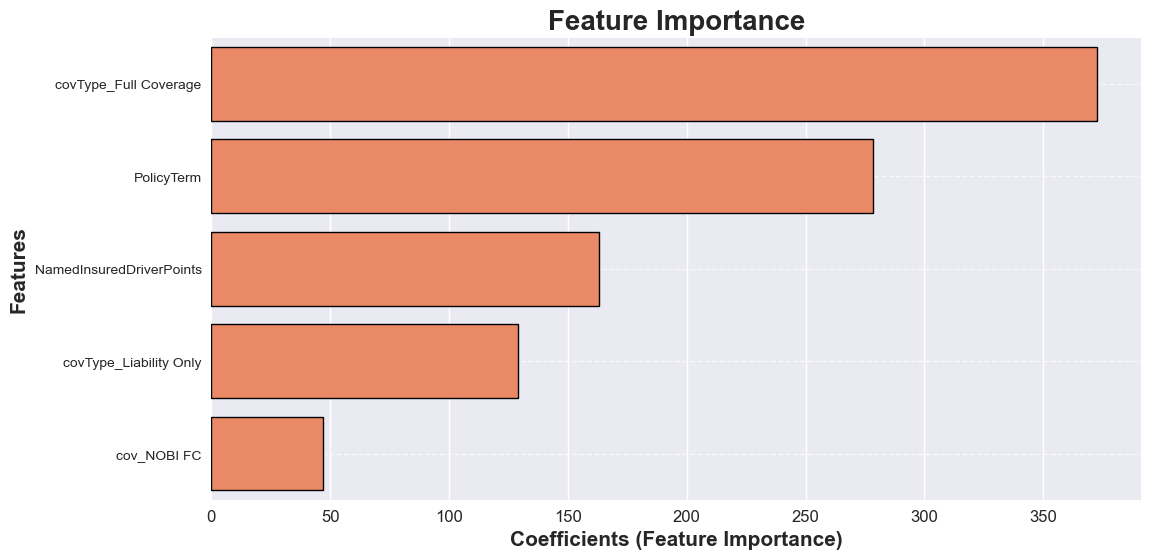

In [80]:
plt.figure(figsize=(12, 6))

sns.barplot(x = 'ridge_coeff', y ='Feature', data = top_features, color='coral', edgecolor='black', linewidth=1)
plt.title('Feature Importance', fontsize=20, fontweight='bold')
plt.xlabel('Coefficients (Feature Importance)', fontsize=15, fontweight='bold')
plt.ylabel('Features', fontsize=15, fontweight='bold')

plt.xticks(rotation=0, fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10),  # Adjust position slightly above the bar
                textcoords='offset points', 
                fontsize=12, fontweight='bold', color='black')
plt.show()

#### Explanation of the Ridge Regression

With a predefined alpha level of 50, the ridge model gives an R-squared score of 53.9%. The adjusted R-squared is 53.9%, which means that a 53.9% variation of MQuotedTotalPayment is explained by the relationship with the feature variables.

## Modeling for Policy Risk 

In [81]:
df_TheGeneral.head()

,PolicyNumber,DriverNumber,AbilitecContactID,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,DateOfLoss,TermEffectiveDate,FirstDaysToClaim,FirstHoursToClaim,SumClaimTransPaidLoss,ClaimTransCount
0,Q080MDA2MDUz,1,04ZJUS01XEYDG9QF,04ZJUS0356VDYBTY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q080MDA2NDE5,1,04ZJUS01QW3YR5MP,04ZJUS03B7YGD1HL,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q080MDA2ODM3,1,04ZJUS0143LMD00Z,04ZJUS03QVT5HVY8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q080MDA3Nzky,1,04ZJUS117G4VY1QT,04ZJUS034E00L23R,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q080MDA5OTky,1,04ZJUS02NNX4E5CQ,04ZJUS03135C7LL6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df_Abilitech.head()

,AbilitecContactID,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys
0,04ZJUS11ZZX6Z5PH,4.0,14.0,8,13.0,4.0,18.0,3.0,14.0,7.0,11,14.0,19,6.0,2.0,7.0,7.0,5.0,18.0,8.0,8.0,18.0,3.0,8.0,17.0,5.0,9.0,13.0,12.0,12.0,9.0,6.0,12.0,6.0,13.0,9.0,17.0,3.0,6.0,2.0
1,04ZJUS11ZZV842QB,2.0,10.0,2,3.0,6.0,1.0,9.0,17.0,5.0,7,2.0,12,4.0,8.0,4.0,1.0,14.0,6.0,3.0,12.0,1.0,5.0,18.0,3.0,6.0,4.0,13.0,4.0,3.0,7.0,7.0,1.0,6.0,8.0,8.0,9.0,7.0,14.0,12.0
2,04ZJUS11ZZT1XXYJ,5.0,8.0,20,10.0,3.0,10.0,4.0,14.0,2.0,11,17.0,19,4.0,1.0,1.0,10.0,3.0,15.0,1.0,1.0,18.0,1.0,1.0,15.0,3.0,1.0,13.0,20.0,15.0,7.0,4.0,16.0,1.0,19.0,1.0,19.0,1.0,1.0,2.0
3,04ZJUS11ZZPV93BL,6.0,2.0,7,4.0,6.0,6.0,3.0,20.0,4.0,10,11.0,17,2.0,3.0,3.0,6.0,13.0,14.0,3.0,5.0,4.0,5.0,8.0,9.0,3.0,5.0,12.0,9.0,8.0,14.0,3.0,10.0,4.0,9.0,4.0,14.0,2.0,3.0,3.0
4,04ZJUS11ZZPDGK4D,3.0,2.0,5,7.0,4.0,5.0,3.0,19.0,5.0,1,12.0,3,3.0,1.0,3.0,8.0,9.0,17.0,2.0,4.0,6.0,3.0,4.0,18.0,3.0,3.0,9.0,14.0,8.0,16.0,2.0,14.0,4.0,19.0,7.0,15.0,2.0,2.0,5.0


In [83]:
df_policy_risk = pd.merge(df_TheGeneral, df_Abilitech, how = 'inner', on = 'AbilitecContactID')

In [84]:
df_policy_risk.head()

,PolicyNumber,DriverNumber,AbilitecContactID,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,DateOfLoss,TermEffectiveDate,FirstDaysToClaim,FirstHoursToClaim,SumClaimTransPaidLoss,ClaimTransCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys
0,Q080MDA2MDUz,1,04ZJUS01XEYDG9QF,04ZJUS0356VDYBTY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,19.0,19,20.0,19.0,15.0,19.0,1.0,18.0,15,9.0,19,20.0,19.0,12.0,10.0,1.0,14.0,17.0,14.0,9.0,18.0,19.0,13.0,19.0,18.0,1.0,2.0,14.0,2.0,18.0,15.0,19.0,7.0,19.0,10.0,19.0,19.0,18.0
1,Q080MDA2NDE5,1,04ZJUS01QW3YR5MP,04ZJUS03B7YGD1HL,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,8,10.0,6.0,5.0,3.0,19.0,4.0,11,11.0,19,2.0,2.0,5.0,6.0,6.0,14.0,4.0,9.0,6.0,5.0,11.0,10.0,4.0,5.0,13.0,11.0,13.0,16.0,3.0,3.0,3.0,12.0,4.0,8.0,5.0,3.0,8.0
2,Q080MjQ2OTkx,1,04ZJUS01QW3YR5MP,04ZJUS03B7YGD1HL,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,8,10.0,6.0,5.0,3.0,19.0,4.0,11,11.0,19,2.0,2.0,5.0,6.0,6.0,14.0,4.0,9.0,6.0,5.0,11.0,10.0,4.0,5.0,13.0,11.0,13.0,16.0,3.0,3.0,3.0,12.0,4.0,8.0,5.0,3.0,8.0
3,Q080MDA2ODM3,1,04ZJUS0143LMD00Z,04ZJUS03QVT5HVY8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,6.0,11,9.0,1.0,18.0,2.0,12.0,2.0,3,10.0,7,11.0,8.0,12.0,4.0,10.0,8.0,7.0,16.0,12.0,2.0,15.0,15.0,12.0,7.0,14.0,5.0,7.0,17.0,10.0,3.0,7.0,10.0,5.0,3.0,10.0,4.0,16.0
4,Q080MDA5OTky,1,04ZJUS02NNX4E5CQ,04ZJUS03135C7LL6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,12.0,3,5.0,5.0,2.0,10.0,14.0,8.0,6,2.0,10,11.0,16.0,10.0,1.0,17.0,9.0,8.0,17.0,1.0,11.0,19.0,3.0,12.0,10.0,4.0,8.0,1.0,15.0,13.0,1.0,11.0,8.0,8.0,8.0,13.0,16.0,17.0


In [85]:
df_policy_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33597 entries, 0 to 33596
Data columns (total 52 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   PolicyNumber                                                                      33597 non-null  object 
 1   DriverNumber                                                                      33597 non-null  int64  
 2   AbilitecContactID                                                                 33597 non-null  object 
 3   AbilitecHouseholdID                                                               33597 non-null  object 
 4   DriverCount                                                                       33597 non-null  int64  
 5   ClaimCount                                                                        7098 non-null   float64
 6 

In [86]:
df_policy_risk = df_policy_risk.dropna()
df_policy_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7098 entries, 9 to 33588
Data columns (total 52 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   PolicyNumber                                                                      7098 non-null   object 
 1   DriverNumber                                                                      7098 non-null   int64  
 2   AbilitecContactID                                                                 7098 non-null   object 
 3   AbilitecHouseholdID                                                               7098 non-null   object 
 4   DriverCount                                                                       7098 non-null   int64  
 5   ClaimCount                                                                        7098 non-null   float64
 6  

In [87]:
df_policy_risk.head()

,PolicyNumber,DriverNumber,AbilitecContactID,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,DateOfLoss,TermEffectiveDate,FirstDaysToClaim,FirstHoursToClaim,SumClaimTransPaidLoss,ClaimTransCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys
9,Q08yOTQyNDU1,1,04ZJUS018SRG545S,04ZJUS03KNPDGT6S,3,1.0,19066.60,2016-09-07 00:00:00,2016-05-18 00:00:00,112.0,2688.0,19066.60,24.0,14.0,12.0,17,1.0,1.0,3.0,1.0,6.0,1.0,9,4.0,14,5.0,14.0,6.0,1.0,7.0,5.0,1.0,6.0,1.0,1.0,17.0,2.0,3.0,1.0,5.0,3.0,6.0,10.0,6.0,1.0,16.0,2.0,1.0,12.0,8.0,11.0,12.0
10,Q080MDE1MTY2,1,04ZJUS02EXPR09CB,04ZJUS0300X496LW,4,1.0,5086.61,2018-08-06 00:00:00,2018-05-29 00:00:00,69.0,1656.0,5086.61,9.0,10.0,16.0,14,13.0,10.0,13.0,5.0,5.0,10.0,10,16.0,17,17.0,15.0,11.0,12.0,8.0,5.0,13.0,14.0,3.0,15.0,12.0,7.0,14.0,15.0,13.0,5.0,12.0,6.0,16.0,3.0,15.0,14.0,14.0,12.0,18.0,17.0,17.0
18,Q080Mjc2Njc2,1,04ZJUS0215TFZNST,04ZJUS031C5F92YE,2,1.0,1784.85,2019-02-22 00:00:00,2018-11-30 00:00:00,84.0,2016.0,1784.85,7.0,1.0,8.0,18,4.0,5.0,1.0,3.0,15.0,2.0,5,3.0,8,10.0,13.0,12.0,1.0,10.0,11.0,6.0,18.0,3.0,6.0,19.0,7.0,9.0,4.0,2.0,13.0,1.0,19.0,13.0,3.0,10.0,8.0,3.0,4.0,9.0,12.0,17.0
20,Q080MDExOTIz,1,04ZJUS02K2KC7DMW,04ZJUS035ZXBZEH1,2,1.0,21397.74,2018-06-17 00:00:00,2018-05-25 00:00:00,23.0,552.0,21397.74,53.0,6.0,2.0,8,5.0,6.0,6.0,3.0,18.0,4.0,11,11.0,19,2.0,3.0,5.0,6.0,14.0,16.0,4.0,9.0,4.0,5.0,12.0,6.0,3.0,5.0,13.0,8.0,11.0,12.0,3.0,5.0,3.0,9.0,4.0,9.0,2.0,3.0,3.0
29,Q080MzAwMjcy,4,04ZJUS027LKY4PHD,04ZJUS03C0X4KY03,3,3.0,10557.49,2018-12-21 00:00:00,2018-12-17 00:00:00,4.0,96.0,10557.49,32.0,6.0,5.0,15,10.0,11.0,5.0,10.0,15.0,8.0,11,17.0,19,6.0,2.0,10.0,10.0,13.0,11.0,6.0,7.0,8.0,8.0,6.0,15.0,5.0,6.0,13.0,7.0,7.0,11.0,5.0,12.0,5.0,14.0,6.0,10.0,2.0,4.0,4.0


In [88]:
#reset the index

df_policy_risk = df_policy_risk.reset_index()
df_policy_risk = df_policy_risk.drop('index', axis=1)
df_policy_risk.head()

,PolicyNumber,DriverNumber,AbilitecContactID,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,DateOfLoss,TermEffectiveDate,FirstDaysToClaim,FirstHoursToClaim,SumClaimTransPaidLoss,ClaimTransCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys
0,Q08yOTQyNDU1,1,04ZJUS018SRG545S,04ZJUS03KNPDGT6S,3,1.0,19066.60,2016-09-07 00:00:00,2016-05-18 00:00:00,112.0,2688.0,19066.60,24.0,14.0,12.0,17,1.0,1.0,3.0,1.0,6.0,1.0,9,4.0,14,5.0,14.0,6.0,1.0,7.0,5.0,1.0,6.0,1.0,1.0,17.0,2.0,3.0,1.0,5.0,3.0,6.0,10.0,6.0,1.0,16.0,2.0,1.0,12.0,8.0,11.0,12.0
1,Q080MDE1MTY2,1,04ZJUS02EXPR09CB,04ZJUS0300X496LW,4,1.0,5086.61,2018-08-06 00:00:00,2018-05-29 00:00:00,69.0,1656.0,5086.61,9.0,10.0,16.0,14,13.0,10.0,13.0,5.0,5.0,10.0,10,16.0,17,17.0,15.0,11.0,12.0,8.0,5.0,13.0,14.0,3.0,15.0,12.0,7.0,14.0,15.0,13.0,5.0,12.0,6.0,16.0,3.0,15.0,14.0,14.0,12.0,18.0,17.0,17.0
2,Q080Mjc2Njc2,1,04ZJUS0215TFZNST,04ZJUS031C5F92YE,2,1.0,1784.85,2019-02-22 00:00:00,2018-11-30 00:00:00,84.0,2016.0,1784.85,7.0,1.0,8.0,18,4.0,5.0,1.0,3.0,15.0,2.0,5,3.0,8,10.0,13.0,12.0,1.0,10.0,11.0,6.0,18.0,3.0,6.0,19.0,7.0,9.0,4.0,2.0,13.0,1.0,19.0,13.0,3.0,10.0,8.0,3.0,4.0,9.0,12.0,17.0
3,Q080MDExOTIz,1,04ZJUS02K2KC7DMW,04ZJUS035ZXBZEH1,2,1.0,21397.74,2018-06-17 00:00:00,2018-05-25 00:00:00,23.0,552.0,21397.74,53.0,6.0,2.0,8,5.0,6.0,6.0,3.0,18.0,4.0,11,11.0,19,2.0,3.0,5.0,6.0,14.0,16.0,4.0,9.0,4.0,5.0,12.0,6.0,3.0,5.0,13.0,8.0,11.0,12.0,3.0,5.0,3.0,9.0,4.0,9.0,2.0,3.0,3.0
4,Q080MzAwMjcy,4,04ZJUS027LKY4PHD,04ZJUS03C0X4KY03,3,3.0,10557.49,2018-12-21 00:00:00,2018-12-17 00:00:00,4.0,96.0,10557.49,32.0,6.0,5.0,15,10.0,11.0,5.0,10.0,15.0,8.0,11,17.0,19,6.0,2.0,10.0,10.0,13.0,11.0,6.0,7.0,8.0,8.0,6.0,15.0,5.0,6.0,13.0,7.0,7.0,11.0,5.0,12.0,5.0,14.0,6.0,10.0,2.0,4.0,4.0


In [89]:
df_policy_risk.drop(['PolicyNumber', 'AbilitecContactID', 'AbilitecHouseholdID', 'DateOfLoss', 'TermEffectiveDate'], inplace=True, axis=1)

In [90]:
df_policy_risk.head()

,DriverNumber,DriverCount,ClaimCount,TotalPaid,FirstDaysToClaim,FirstHoursToClaim,SumClaimTransPaidLoss,ClaimTransCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys
0,1,3,1.0,19066.60,112.0,2688.0,19066.60,24.0,14.0,12.0,17,1.0,1.0,3.0,1.0,6.0,1.0,9,4.0,14,5.0,14.0,6.0,1.0,7.0,5.0,1.0,6.0,1.0,1.0,17.0,2.0,3.0,1.0,5.0,3.0,6.0,10.0,6.0,1.0,16.0,2.0,1.0,12.0,8.0,11.0,12.0
1,1,4,1.0,5086.61,69.0,1656.0,5086.61,9.0,10.0,16.0,14,13.0,10.0,13.0,5.0,5.0,10.0,10,16.0,17,17.0,15.0,11.0,12.0,8.0,5.0,13.0,14.0,3.0,15.0,12.0,7.0,14.0,15.0,13.0,5.0,12.0,6.0,16.0,3.0,15.0,14.0,14.0,12.0,18.0,17.0,17.0
2,1,2,1.0,1784.85,84.0,2016.0,1784.85,7.0,1.0,8.0,18,4.0,5.0,1.0,3.0,15.0,2.0,5,3.0,8,10.0,13.0,12.0,1.0,10.0,11.0,6.0,18.0,3.0,6.0,19.0,7.0,9.0,4.0,2.0,13.0,1.0,19.0,13.0,3.0,10.0,8.0,3.0,4.0,9.0,12.0,17.0
3,1,2,1.0,21397.74,23.0,552.0,21397.74,53.0,6.0,2.0,8,5.0,6.0,6.0,3.0,18.0,4.0,11,11.0,19,2.0,3.0,5.0,6.0,14.0,16.0,4.0,9.0,4.0,5.0,12.0,6.0,3.0,5.0,13.0,8.0,11.0,12.0,3.0,5.0,3.0,9.0,4.0,9.0,2.0,3.0,3.0
4,4,3,3.0,10557.49,4.0,96.0,10557.49,32.0,6.0,5.0,15,10.0,11.0,5.0,10.0,15.0,8.0,11,17.0,19,6.0,2.0,10.0,10.0,13.0,11.0,6.0,7.0,8.0,8.0,6.0,15.0,5.0,6.0,13.0,7.0,7.0,11.0,5.0,12.0,5.0,14.0,6.0,10.0,2.0,4.0,4.0


In [91]:
df_policy_risk['TotalPaid'].describe()

count      7098.000000
mean       5392.066436
std       10724.783026
min           0.000000
25%           0.000000
50%        1307.955000
75%        5737.792500
max      130141.300000
Name: TotalPaid, dtype: float64

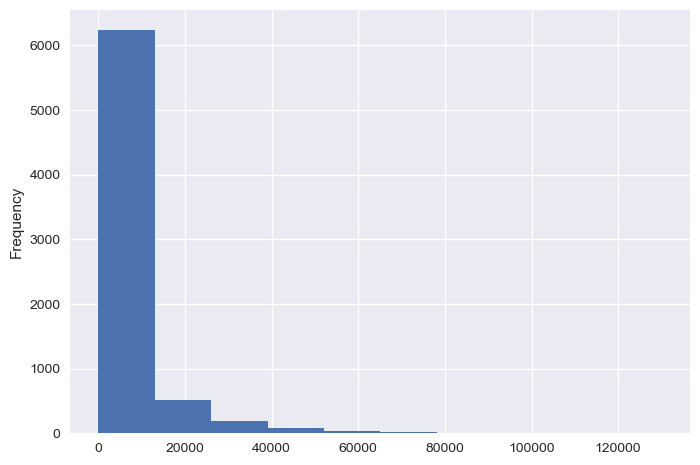

In [92]:
df_policy_risk['TotalPaid'].plot(kind='hist')
plt.show()

In [93]:
def claim_count(a):
    if int(a['ClaimCount']) >= 1:
        return "yes"
    else:
        return "no"
    
df_policy_risk['ClaimCount'] = df_policy_risk.apply(claim_count, axis = 1)

In [94]:
def first_daystoclaim(b):
    if b['FirstDaysToClaim']<= 30:
        return "yes"
    else:
        return "no"
    
df_policy_risk['FirstDaysToClaim'] = df_policy_risk.apply(first_daystoclaim, axis = 1)

In [95]:
def large_claim(c):
    if c['TotalPaid']>=6000:
        return "yes"
    else:
        return "no"
    
df_policy_risk['LargeClaim'] = df_policy_risk.apply(large_claim, axis = 1)

In [96]:
df_policy_risk.head()

,DriverNumber,DriverCount,ClaimCount,TotalPaid,FirstDaysToClaim,FirstHoursToClaim,SumClaimTransPaidLoss,ClaimTransCount,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising,Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising,Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model,Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Fashionable_Style,Influenced_to_Purchase_Online_Pureplay_Footwear,Influenced_to_Purchase_Shoe_Store_Footwear_Based_on_Brand_Preference,Influenced_to_Purchase_Apparel_Specialty_Footwear_Based_on_Brand_Preference,Out_of_Home_Consumption_at_McDonalds,Out_of_Home_Consumption_at_Walmart,Out_of_Home_Consumption_at_Sonic,Out_of_Home_Consumption_at_Jack_in_the_Box,Out_of_Home_Consumption_at_Applebees,Out_of_Home_Consumption_at_Panera_Bread_Company,Out_of_Home_Consumption_at_Dominos,Out_of_Home_Consumption_at_Dairy_Queen,Out_of_Home_Consumption_at_IHOP,Out_of_Home_Consumption_at_Subway,Out_of_Home_Consumption_at_Hardees,Out_of_Home_Consumption_at_Chilis_Grill_Bar,Out_of_Home_Consumption_at_Little_Caesars,Out_of_Home_Consumption_at_Papa_Johns,Out_of_Home_Consumption_at_Dennys,Out_of_Home_Consumption_at_Olive_Garden,Out_of_Home_Consumption_at_Carls_Jr,Out_of_Home_Consumption_at_Cracker_Barrel,Out_of_Home_Consumption_at_Burger_King,Out_of_Home_Consumption_at_Quiznos,Out_of_Home_Consumption_at_Popeyes,Out_of_Home_Consumption_at_TGI_Fridays,Out_of_Home_Consumption_at_Taco_Bell,Out_of_Home_Consumption_at_Dunkin_Donuts,Out_of_Home_Consumption_at_Pizza_Hut,Out_of_Home_Consumption_at_KFC,Out_of_Home_Consumption_at_Arbys,LargeClaim
0,1,3,yes,19066.60,no,2688.0,19066.60,24.0,14.0,12.0,17,1.0,1.0,3.0,1.0,6.0,1.0,9,4.0,14,5.0,14.0,6.0,1.0,7.0,5.0,1.0,6.0,1.0,1.0,17.0,2.0,3.0,1.0,5.0,3.0,6.0,10.0,6.0,1.0,16.0,2.0,1.0,12.0,8.0,11.0,12.0,yes
1,1,4,yes,5086.61,no,1656.0,5086.61,9.0,10.0,16.0,14,13.0,10.0,13.0,5.0,5.0,10.0,10,16.0,17,17.0,15.0,11.0,12.0,8.0,5.0,13.0,14.0,3.0,15.0,12.0,7.0,14.0,15.0,13.0,5.0,12.0,6.0,16.0,3.0,15.0,14.0,14.0,12.0,18.0,17.0,17.0,no
2,1,2,yes,1784.85,no,2016.0,1784.85,7.0,1.0,8.0,18,4.0,5.0,1.0,3.0,15.0,2.0,5,3.0,8,10.0,13.0,12.0,1.0,10.0,11.0,6.0,18.0,3.0,6.0,19.0,7.0,9.0,4.0,2.0,13.0,1.0,19.0,13.0,3.0,10.0,8.0,3.0,4.0,9.0,12.0,17.0,no
3,1,2,yes,21397.74,yes,552.0,21397.74,53.0,6.0,2.0,8,5.0,6.0,6.0,3.0,18.0,4.0,11,11.0,19,2.0,3.0,5.0,6.0,14.0,16.0,4.0,9.0,4.0,5.0,12.0,6.0,3.0,5.0,13.0,8.0,11.0,12.0,3.0,5.0,3.0,9.0,4.0,9.0,2.0,3.0,3.0,yes
4,4,3,yes,10557.49,yes,96.0,10557.49,32.0,6.0,5.0,15,10.0,11.0,5.0,10.0,15.0,8.0,11,17.0,19,6.0,2.0,10.0,10.0,13.0,11.0,6.0,7.0,8.0,8.0,6.0,15.0,5.0,6.0,13.0,7.0,7.0,11.0,5.0,12.0,5.0,14.0,6.0,10.0,2.0,4.0,4.0,yes


### Decision Tree

In [97]:
#create X and y dataframe
#dropped SumClaimTransPaidLoss' (considering TotalPaid was created from it)

X = df_policy_risk.drop(['FirstHoursToClaim','FirstDaysToClaim','TotalPaid', 'ClaimCount', 'SumClaimTransPaidLoss', 'LargeClaim'], axis=1)

y = df_policy_risk['LargeClaim']

In [98]:
#show the value counts of variable y

y = df_policy_risk['LargeClaim']

display(y.value_counts())
display(round(y.value_counts(normalize=True),3))

no     5375
yes    1723
Name: LargeClaim, dtype: int64

no     0.757
yes    0.243
Name: LargeClaim, dtype: float64

- "Yes": If a policy has made a claim within the first 30
- "No": If a policy has not made a claim within the first 30 

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
#split the raw data for decision tree classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

In [102]:
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.tree import DecisionTreeClassifier 

In [103]:
#using a max_depth of 5

classifier=DecisionTreeClassifier(max_depth=5)  
classifier=classifier.fit(X_train,y_train)

In [104]:
#predict the new model

dt_preds = classifier.predict(X_test)

In [105]:
print(confusion_matrix(y_test, dt_preds))  
print("")  
print(classification_report(y_test, dt_preds))

[[1446  142]
 [ 187  355]]

              precision    recall  f1-score   support

          no       0.89      0.91      0.90      1588
         yes       0.71      0.65      0.68       542

    accuracy                           0.85      2130
   macro avg       0.80      0.78      0.79      2130
weighted avg       0.84      0.85      0.84      2130



### Feature Importance

In [106]:
dt_fi = pd.DataFrame(classifier.feature_importances_)  
names = pd.DataFrame(list(X.columns))  
df_feat_imp = pd.concat([dt_fi, names], axis = 1)  
df_feat_imp.columns = ['Importance', 'Features']  
df_feat_imp.sort_values('Importance', ascending = False)

,Importance,Features
2,0.935747,ClaimTransCount
15,0.009510,Out_of_Home_Consumption_at_McDonalds
40,0.009379,Out_of_Home_Consumption_at_KFC
31,0.004808,Out_of_Home_Consumption_at_Carls_Jr
35,0.004766,Out_of_Home_Consumption_at_Popeyes
0,0.004125,DriverNumber
30,0.003921,Out_of_Home_Consumption_at_Olive_Garden
34,0.003906,Out_of_Home_Consumption_at_Quiznos
5,0.003744,Influenced_to_Purchase_Department_Store_Footwe...
29,0.003663,Out_of_Home_Consumption_at_Dennys


I used the raw data for the decision tree analysis, considering that decision trees are scale invariant.

**- Explaining the aw Data Results of the Decision Tree**

**Performance Metrics:**
Accuracy: 85%
Precision: 71%
Recall: 65%
F1-Score: 68%

**Key Insights:**
True Positives: 355 policyholders correctly identified as high-risk (large claims).
False Positives: 142 policyholders were flagged as high-risk but were not.
False Negatives: 187 high-risk policyholders were missed by the model.
True Negatives: 1446 policyholders correctly identified as not high-risk (no large claims)

**Feature Importance**
From the decision tree, some of the important features are:
- ClaimTransCount
- Out_of_Home_Consumption_at_Panera_Bread_Company
- Influenced_to_Purchase_Athletic_Shoe_Store_Foo...
- Out_of_Home_Consumption_at_IHOP
- Out_of_Home_Consumption_at_Popeyes
- Out_of_Home_Consumption_at_Carls_Jr
- Out_of_Home_Consumption_at_Quiznos
- Out_of_Home_Consumption_at_Cracker_Barrel
- Influenced_to_Purchase_Athletic_Shoe_Store_Foo...
- Out_of_Home_Consumption_at_Burger_King
- Out_of_Home_Consumption_at_Dennys
- Influenced_to_Purchase_Shoe_Store_Footwear_Bas...
- DriverNumber
- Out_of_Home_Consumption_at_Taco_Bell
- Out_of_Home_Consumption_at_Olive_Garden
- Out_of_Home_Consumption_at_TGI_Fridays
- Out_of_Home_Consumption_at_Dairy_Queen